# predict the Homestay prices of Residential Properties using Regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel("Air_BNB.xlsx")

In [4]:
df.head(5)

id        room_type  accommodates  bathrooms cancellation_policy  \
0   6901257  Entire home/apt           3.0        1.0              strict   
1   6304928  Entire home/apt           7.0        1.0              strict   
2   7919400  Entire home/apt           5.0        1.0            moderate   
3  13418779  Entire home/apt           4.0        1.0            flexible   
4   3808709  Entire home/apt           2.0        1.0            moderate   

   cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0           1.0                f                 100.0       1.0   1.0   
1           1.0                t                  93.0       3.0   3.0   
2           1.0                t                  92.0       1.0   3.0   
3           1.0                f                   NaN       2.0   2.0   
4           1.0                t                  40.0       0.0   1.0   

   log_price  
0   5.010635  
1   5.129899  
2   4.976734  
3   6.620073  
4   4.744932

In [5]:
df.tail(5)

id        room_type  accommodates  bathrooms cancellation_policy  \
74106  14549287     Private room           1.0        1.0            flexible   
74107  13281809  Entire home/apt           4.0        2.0            moderate   
74108  18688039  Entire home/apt           5.0        1.0            moderate   
74109  17045948  Entire home/apt           2.0        1.0              strict   
74110   3534845  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
74106           0.0                f                   NaN       1.0   1.0   
74107           1.0                f                  93.0       2.0   4.0   
74108           1.0                t                  94.0       2.0   2.0   
74109           1.0                t                   NaN       0.0   2.0   
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

room_type  accommodates  bathrooms cancellation_policy  cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict           1.0   
1  Entire home/apt           7.0        1.0              strict           1.0   
2  Entire home/apt           5.0        1.0            moderate           1.0   
3  Entire home/apt           4.0        1.0            flexible           1.0   
4  Entire home/apt           2.0        1.0            moderate           1.0   

  instant_bookable  review_scores_rating  bedrooms  beds  log_price  
0                f                 100.0       1.0   1.0   5.010635  
1                t                  93.0       3.0   3.0   5.129899  
2                t                  92.0       1.0   3.0   4.976734  
3                f                   NaN       2.0   2.0   6.620073  
4                t                  40.0       0.0   1.0   4.744932

In [8]:
print("The number of colums is",df.shape[1])
print("The number of rows is",df.shape[0])

The number of colums is 10
The number of rows is 74111


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [10]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [11]:
df.dtypes

room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee            float64
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

In [12]:
object_columns = df.select_dtypes(include='object').columns

In [13]:
#object_columns = df.select_dtypes(include='object').columns
#object_columns = df.dtypes[df.dtypes == 'object']
object_columns

Index(['room_type', 'cancellation_policy', 'instant_bookable'], dtype='object')

In [14]:
nummeric_columns= df.select_dtypes(include='float').columns
nummeric_columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price'],
      dtype='object')

In [15]:
df.describe()

accommodates     bathrooms  cleaning_fee  review_scores_rating  \
count  74108.000000  73908.000000  74107.000000          57389.000000   
mean       3.155125      1.235272      0.734060             94.067365   
std        2.153603      0.582054      0.441835              7.836556   
min        1.000000      0.000000      0.000000             20.000000   
25%        2.000000      1.000000      0.000000             92.000000   
50%        2.000000      1.000000      1.000000             96.000000   
75%        4.000000      1.000000      1.000000            100.000000   
max       16.000000      8.000000      1.000000            100.000000   

           bedrooms          beds     log_price  
count  74019.000000  73980.000000  74111.000000  
mean       1.265797      1.710868      4.782069  
std        0.852149      1.254142      0.717394  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000      4.317488  
50%        1.000000      1.000000      4.709530  
75%        1.000000      2.000000      5.220356  
max       10.000000     18.000000      7.600402

In [16]:
round(df.describe(),2)

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
count      74108.00   73908.00      74107.00              57389.00  74019.00   
mean           3.16       1.24          0.73                 94.07      1.27   
std            2.15       0.58          0.44                  7.84      0.85   
min            1.00       0.00          0.00                 20.00      0.00   
25%            2.00       1.00          0.00                 92.00      1.00   
50%            2.00       1.00          1.00                 96.00      1.00   
75%            4.00       1.00          1.00                100.00      1.00   
max           16.00       8.00          1.00                100.00     10.00   

           beds  log_price  
count  73980.00   74111.00  
mean       1.71       4.78  
std        1.25       0.72  
min        0.00       0.00  
25%        1.00       4.32  
50%        1.00       4.71  
75%        2.00       5.22  
max       18.00       7.60

In [17]:
round(df.describe(),2).T

count   mean   std   min    25%    50%     75%    max
accommodates          74108.0   3.16  2.15   1.0   2.00   2.00    4.00   16.0
bathrooms             73908.0   1.24  0.58   0.0   1.00   1.00    1.00    8.0
cleaning_fee          74107.0   0.73  0.44   0.0   0.00   1.00    1.00    1.0
review_scores_rating  57389.0  94.07  7.84  20.0  92.00  96.00  100.00  100.0
bedrooms              74019.0   1.27  0.85   0.0   1.00   1.00    1.00   10.0
beds                  73980.0   1.71  1.25   0.0   1.00   1.00    2.00   18.0
log_price             74111.0   4.78  0.72   0.0   4.32   4.71    5.22    7.6

In [18]:
numeric_df = df.select_dtypes(include=[float, int])

In [19]:
correlation_matrix = numeric_df.corr()

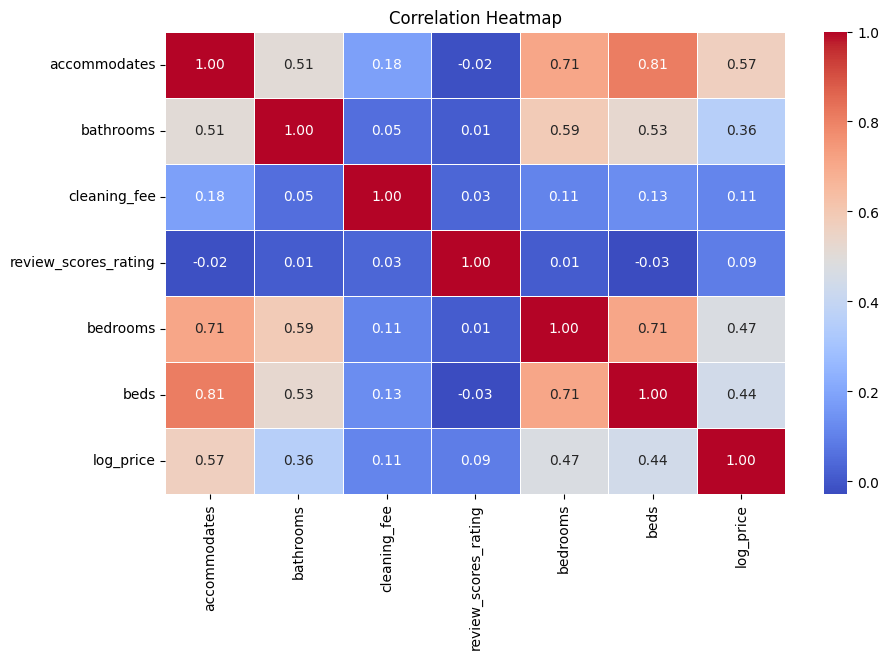

In [20]:
plt.figure(figsize=(10, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
round(df.describe(include='all'),2)

room_type  accommodates  bathrooms cancellation_policy  \
count             74106      74108.00   73908.00               74103   
unique                3           NaN        NaN                   3   
top     Entire home/apt           NaN        NaN              strict   
freq              41308           NaN        NaN               32500   
mean                NaN          3.16       1.24                 NaN   
std                 NaN          2.15       0.58                 NaN   
min                 NaN          1.00       0.00                 NaN   
25%                 NaN          2.00       1.00                 NaN   
50%                 NaN          2.00       1.00                 NaN   
75%                 NaN          4.00       1.00                 NaN   
max                 NaN         16.00       8.00                 NaN   

        cleaning_fee instant_bookable  review_scores_rating  bedrooms  \
count       74107.00            74111              57389.00  74019.00   
unique           NaN                2                   NaN       NaN   
top              NaN                f                   NaN       NaN   
freq             NaN            54660                   NaN       NaN   
mean            0.73              NaN                 94.07      1.27   
std             0.44              NaN                  7.84      0.85   
min             0.00              NaN                 20.00      0.00   
25%             0.00              NaN                 92.00      1.00   
50%             1.00              NaN                 96.00      1.00   
75%             1.00              NaN                100.00      1.00   
max             1.00              NaN                100.00     10.00   

            beds  log_price  
count   73980.00   74111.00  
unique       NaN        NaN  
top          NaN        NaN  
freq         NaN        NaN  
mean        1.71       4.78  
std         1.25       0.72  
min         0.00       0.00  
25%         1.00       4.32  
50%         1.00       4.71  
75%         2.00       5.22  
max        18.00       7.60

In [22]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [23]:
for col in object_columns:
    print("Column:", col)
    print("Number of unique values:", df[col].nunique())
    print("Value counts:")
    print(df[col].value_counts())
    print("\n")

Column: room_type
Number of unique values: 3
Value counts:
room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64


Column: cancellation_policy
Number of unique values: 3
Value counts:
cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64


Column: instant_bookable
Number of unique values: 2
Value counts:
instant_bookable
f    54660
t    19451
Name: count, dtype: int64




In [24]:
df_2=df.copy()

In [25]:
df_2.head()

room_type  accommodates  bathrooms cancellation_policy  cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict           1.0   
1  Entire home/apt           7.0        1.0              strict           1.0   
2  Entire home/apt           5.0        1.0            moderate           1.0   
3  Entire home/apt           4.0        1.0            flexible           1.0   
4  Entire home/apt           2.0        1.0            moderate           1.0   

  instant_bookable  review_scores_rating  bedrooms  beds  log_price  
0                f                 100.0       1.0   1.0   5.010635  
1                t                  93.0       3.0   3.0   5.129899  
2                t                  92.0       1.0   3.0   4.976734  
3                f                   NaN       2.0   2.0   6.620073  
4                t                  40.0       0.0   1.0   4.744932

In [26]:
df_2.duplicated().sum()

np.int64(19994)

In [27]:
df_2[df_2.duplicated()]

room_type  accommodates  bathrooms cancellation_policy  \
70        Private room           2.0        1.0            flexible   
260    Entire home/apt           3.0        1.0              strict   
313       Private room           2.0        1.0            flexible   
426    Entire home/apt           2.0        1.0            flexible   
543       Private room           2.0        1.0            moderate   
...                ...           ...        ...                 ...   
74096     Private room           2.0        1.0            flexible   
74100     Private room           2.0        1.0              strict   
74103  Entire home/apt           2.0        1.0            moderate   
74105     Private room           2.0        1.0            moderate   
74106     Private room           1.0        1.0            flexible   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
70              1.0                f                 100.0       1.0   1.0   
260             1.0                f                 100.0       1.0   1.0   
313             0.0                f                   NaN       1.0   1.0   
426             1.0                f                 100.0       1.0   1.0   
543             0.0                f                   NaN       1.0   1.0   
...             ...              ...                   ...       ...   ...   
74096           0.0                f                  60.0       1.0   1.0   
74100           1.0                f                  93.0       1.0   1.0   
74103           1.0                f                  98.0       1.0   1.0   
74105           1.0                f                  91.0       1.0   1.0   
74106           0.0                f                   NaN       1.0   1.0   

       log_price  
70      4.779123  
260     5.164786  
313     5.010635  
426     4.595120  
543     4.382027  
...          ...  
74096   3.912023  
74100   4.605170  
74103   5.135798  
74105   4.248495  
74106   4.605170  

[19994 rows x 10 columns]

In [28]:
df_2.drop_duplicates(inplace=True)

In [29]:
df_2.duplicated().sum()

np.int64(0)

In [30]:
df_2.head()

room_type  accommodates  bathrooms cancellation_policy  cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict           1.0   
1  Entire home/apt           7.0        1.0              strict           1.0   
2  Entire home/apt           5.0        1.0            moderate           1.0   
3  Entire home/apt           4.0        1.0            flexible           1.0   
4  Entire home/apt           2.0        1.0            moderate           1.0   

  instant_bookable  review_scores_rating  bedrooms  beds  log_price  
0                f                 100.0       1.0   1.0   5.010635  
1                t                  93.0       3.0   3.0   5.129899  
2                t                  92.0       1.0   3.0   4.976734  
3                f                   NaN       2.0   2.0   6.620073  
4                t                  40.0       0.0   1.0   4.744932

In [31]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

<Axes: >

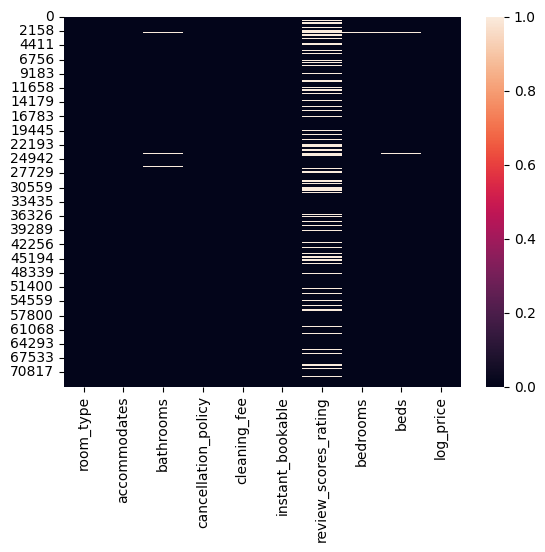

In [32]:
sns.heatmap(df_2.isnull())

In [33]:
round((df_2.isnull().sum().sort_values(ascending=False)/df_2.shape[0]*100),2)

review_scores_rating    18.88
bathrooms                0.36
beds                     0.23
bedrooms                 0.17
cancellation_policy      0.01
room_type                0.01
cleaning_fee             0.01
accommodates             0.01
instant_bookable         0.00
log_price                0.00
dtype: float64

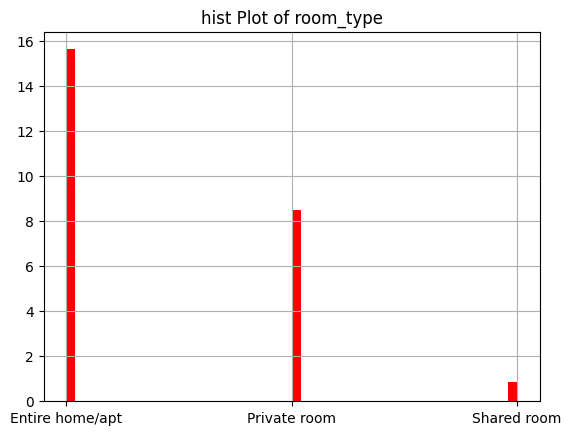

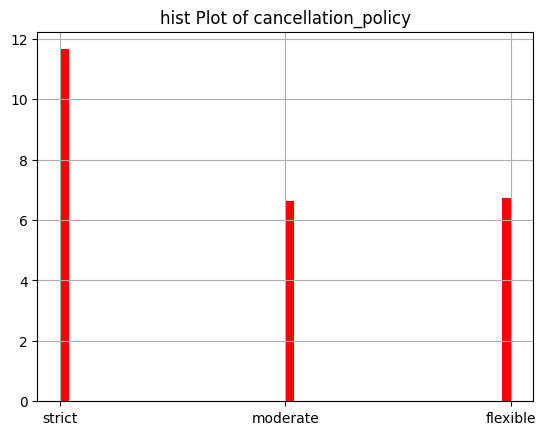

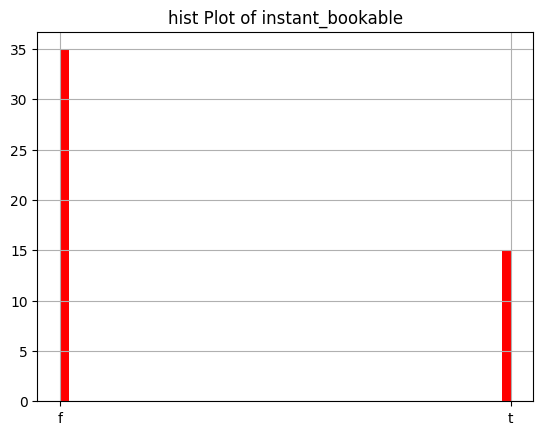

In [34]:
for col in object_columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df_2[col].hist(bins=50, ax=ax, density=True, color='red')
    plt.title(f'hist Plot of {col}')

In [35]:
df_obj=df_2[object_columns]

In [36]:
df_obj.head()

room_type cancellation_policy instant_bookable
0  Entire home/apt              strict                f
1  Entire home/apt              strict                t
2  Entire home/apt            moderate                t
3  Entire home/apt            flexible                f
4  Entire home/apt            moderate                t

In [37]:
for col in df_obj.columns:
    mode_value = df_obj[col].mode()[0]  
    df_obj[col].fillna(mode_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6576\1228313063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obj[col].fillna(mode_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6576\1228313063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[col].fillna(mode_value, inplace=True)


In [38]:
df_obj.isnull().sum()

room_type              0
cancellation_policy    0
instant_bookable       0
dtype: int64

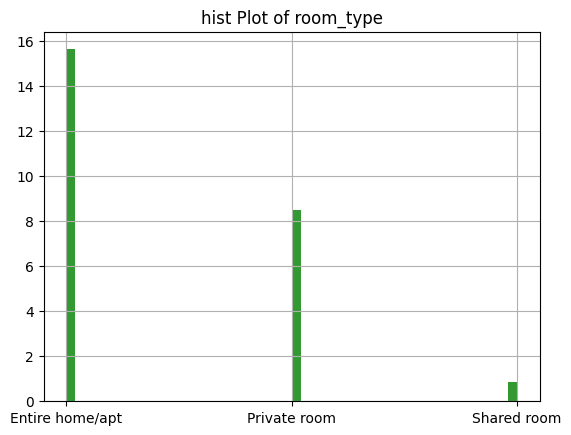

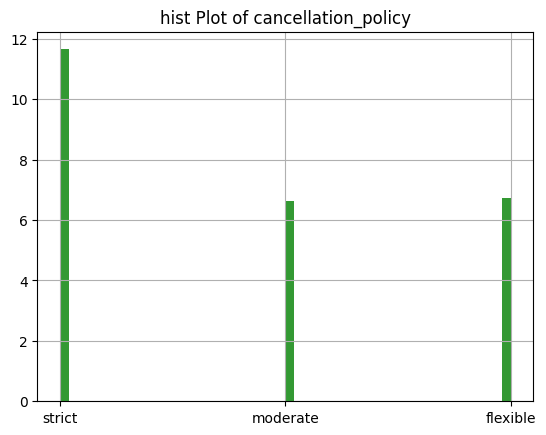

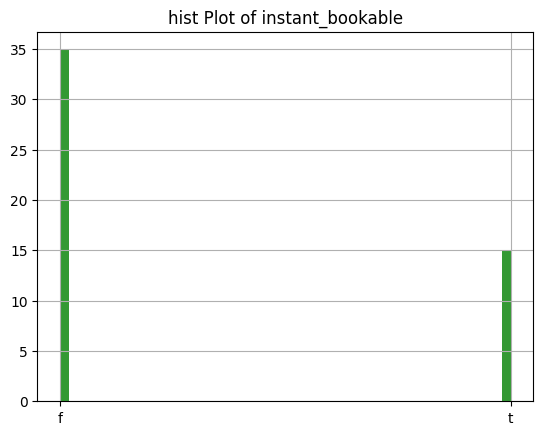

In [39]:
for col in df_obj.columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df_obj[col].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
    plt.title(f'hist Plot of {col}')

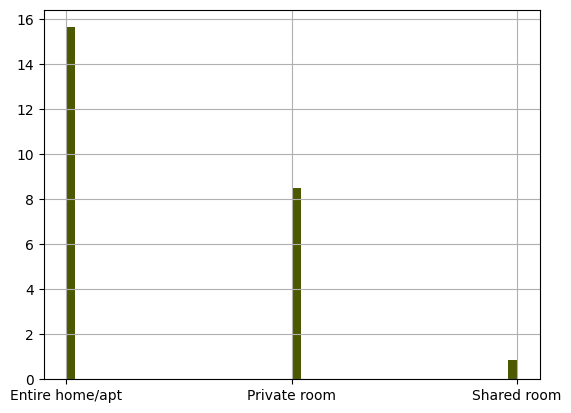

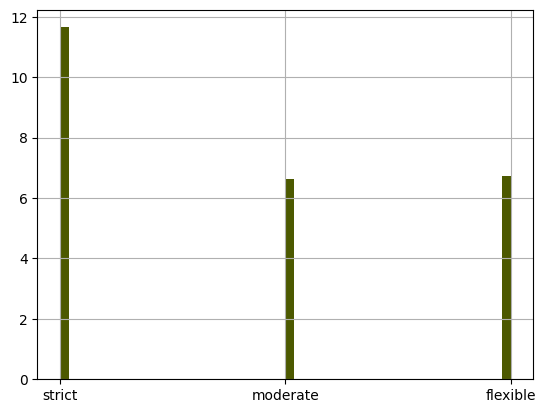

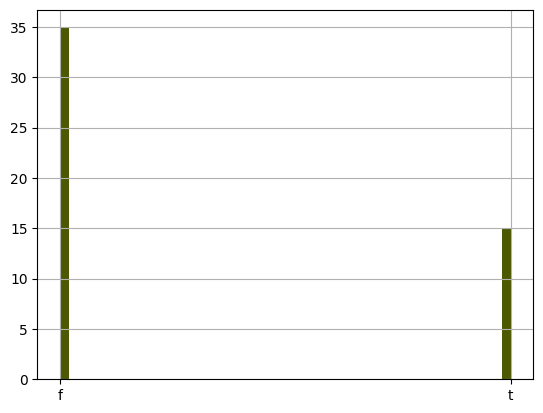

In [40]:
for col in object_columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
# original data
    df_2[col].hist(bins=50, ax=ax, density=True, color='red')
    df_obj[col].hist(bins=50, ax=ax, color='green', density=True, alpha=0.7)

In [41]:
nummeric_columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price'],
      dtype='object')

In [42]:
df_2_numd=df_2[nummeric_columns]

In [43]:
df_2_numd.isnull().sum().sort_values(ascending=False)/df_2_numd.shape[0]*100

review_scores_rating    18.875769
bathrooms                0.360330
beds                     0.230981
bedrooms                 0.170002
cleaning_fee             0.007391
accommodates             0.005544
log_price                0.000000
dtype: float64

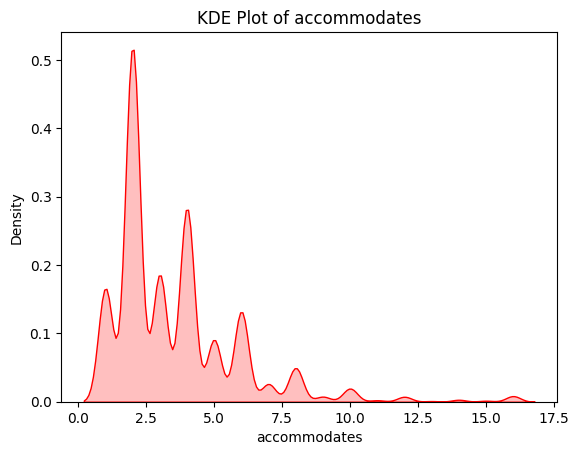

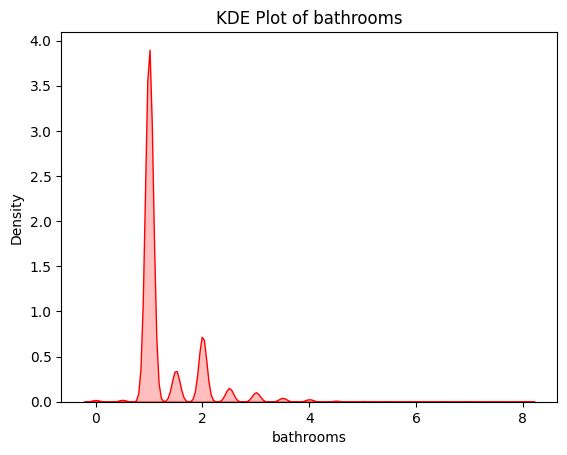

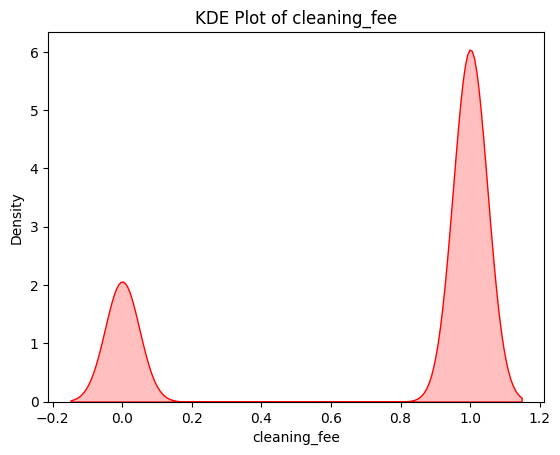

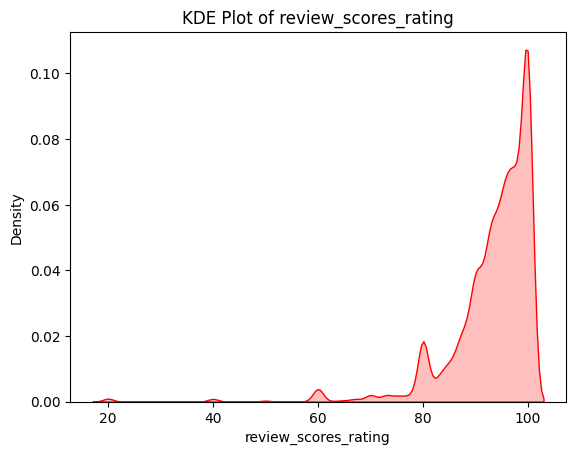

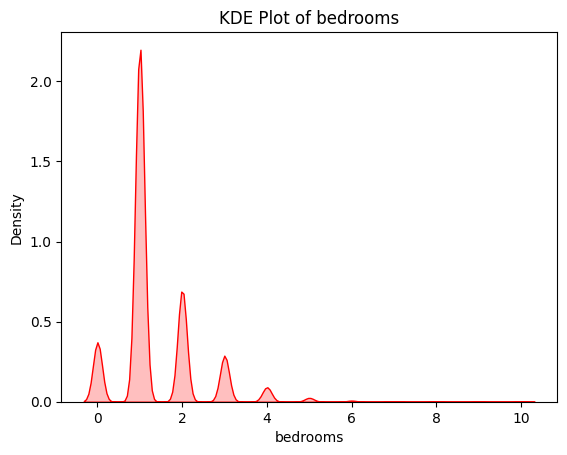

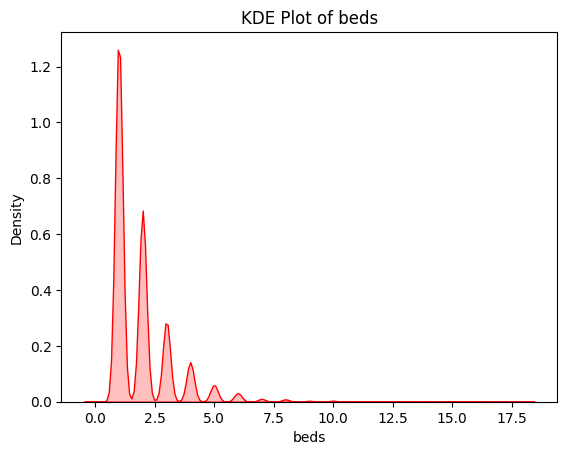

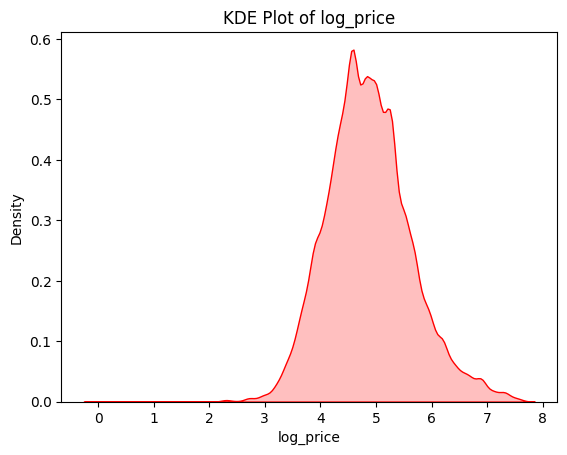

In [44]:
for col in df_2_numd.columns:
    plt.figure()
    sns.kdeplot(df_2_numd[col], fill=True, color='red')
    plt.title('KDE Plot of ' + col)
    plt.show()

In [45]:
df_2_numd_mean=df_2_numd.copy()

In [46]:
df_2_numd_mean.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                   NaN       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price  
0   1.0   5.010635  
1   3.0   5.129899  
2   3.0   4.976734  
3   2.0   6.620073  
4   1.0   4.744932

In [47]:
for col in df_2_numd_mean.columns:
    mean_value = df_2_numd_mean[col].mean()
    df_2_numd_mean[col].fillna(mean_value,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6576\3638091317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2_numd_mean[col].fillna(mean_value,inplace=True)


In [48]:
df_2_numd_mean.isnull().sum().sort_values(ascending=False)/df_2_numd.shape[0]*100

accommodates            0.0
bathrooms               0.0
cleaning_fee            0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
dtype: float64

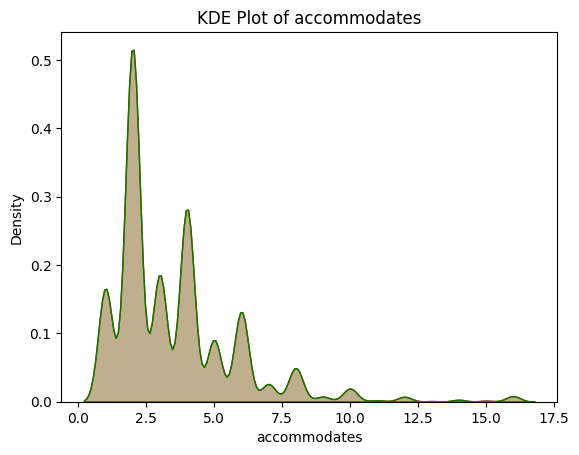

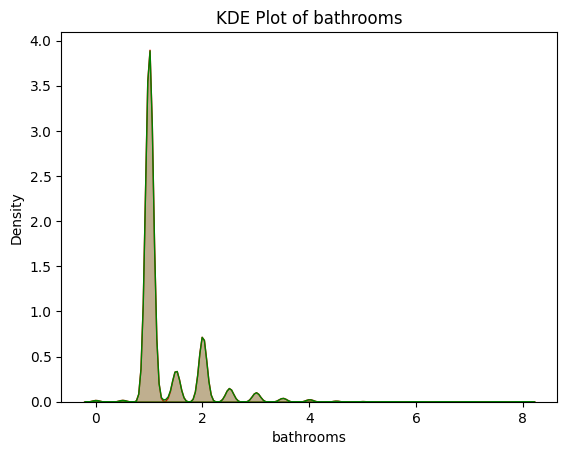

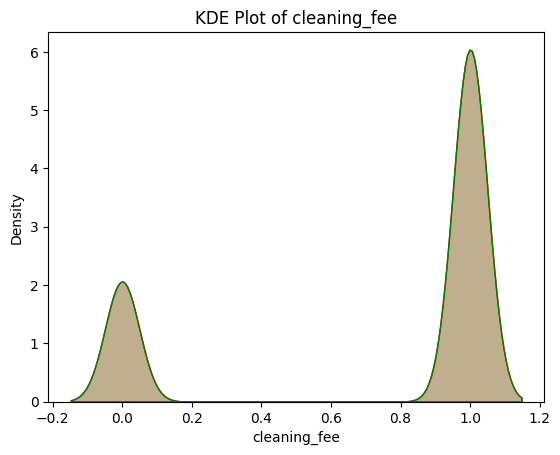

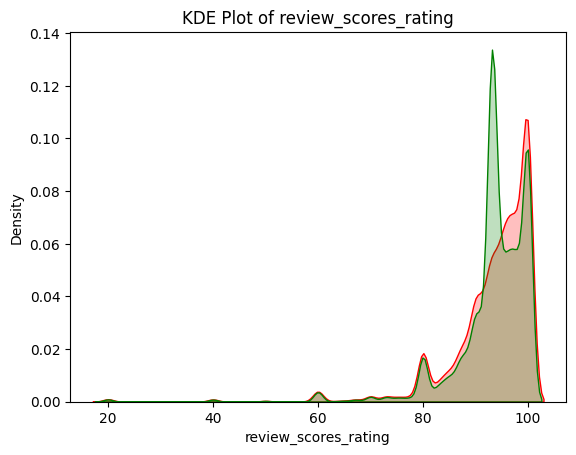

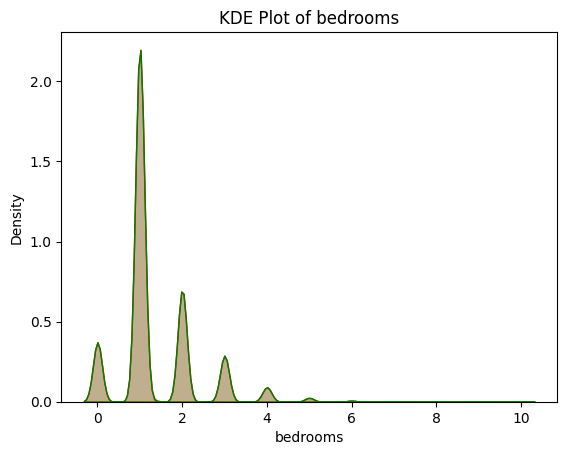

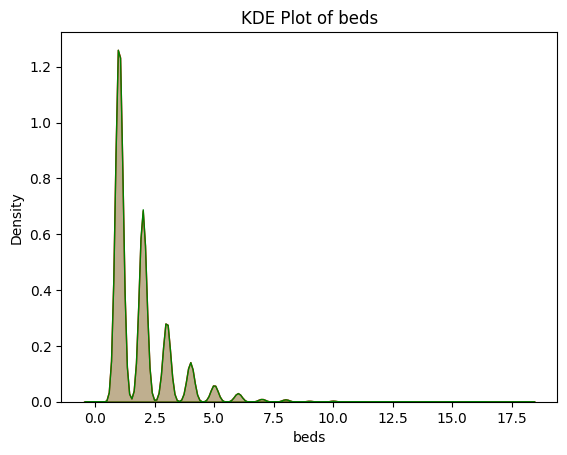

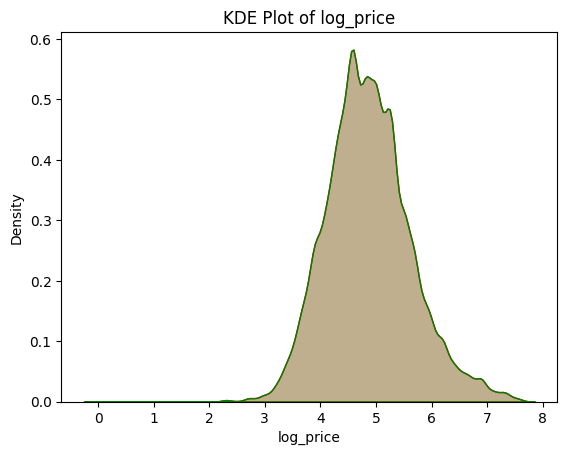

In [49]:
for col in df_2_numd.columns:
    plt.figure()
    sns.kdeplot(df_2_numd[col], fill=True, color='red')
    sns.kdeplot(df_2_numd_mean[col], fill=True, color='green')
    plt.title('KDE Plot of ' + col)
    plt.show()

In [50]:
df_2_numd_median=df_2_numd.copy()

In [51]:
df_2_numd_median.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                   NaN       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price  
0   1.0   5.010635  
1   3.0   5.129899  
2   3.0   4.976734  
3   2.0   6.620073  
4   1.0   4.744932

In [52]:
df_2_numd_median.isnull().sum().sort_values(ascending=False)/df_2_numd.shape[0]*100

review_scores_rating    18.875769
bathrooms                0.360330
beds                     0.230981
bedrooms                 0.170002
cleaning_fee             0.007391
accommodates             0.005544
log_price                0.000000
dtype: float64

In [53]:
for col in df_2_numd_median.columns:
    median_value = df_2_numd_median[col].median()
    df_2_numd_median[col].fillna(median_value,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6576\2849523241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2_numd_median[col].fillna(median_value,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6576\2849523241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [54]:
df_2_numd_median.isnull().sum().sort_values(ascending=False)/df_2_numd.shape[0]*100

accommodates            0.0
bathrooms               0.0
cleaning_fee            0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
dtype: float64

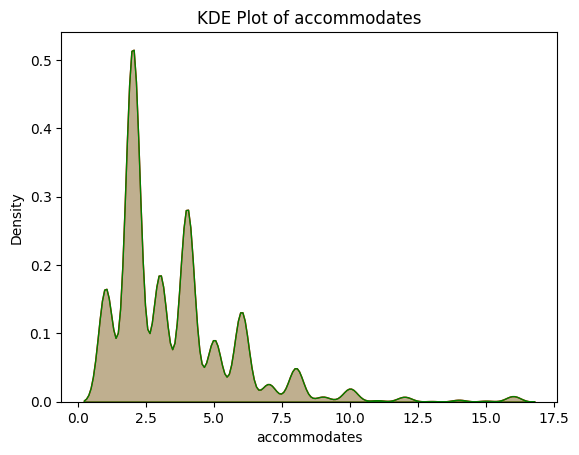

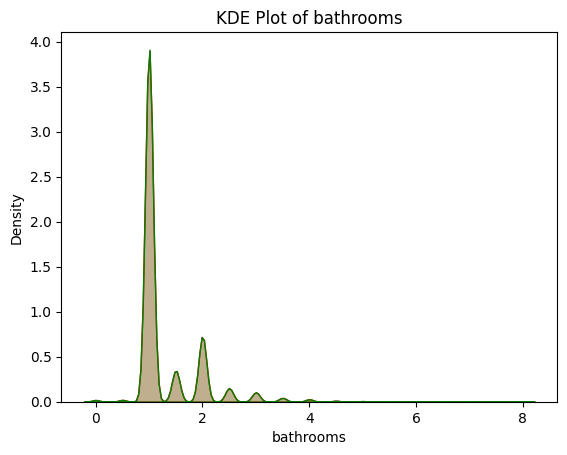

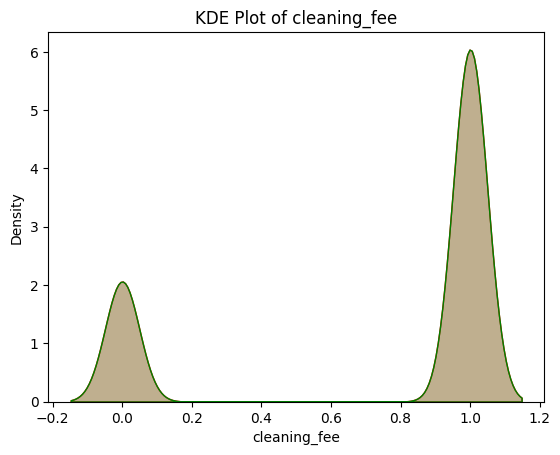

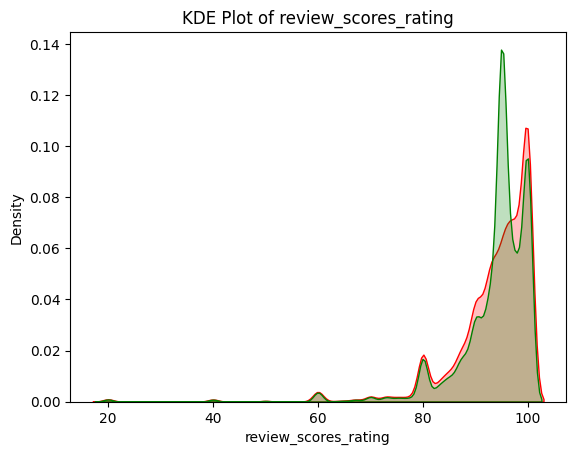

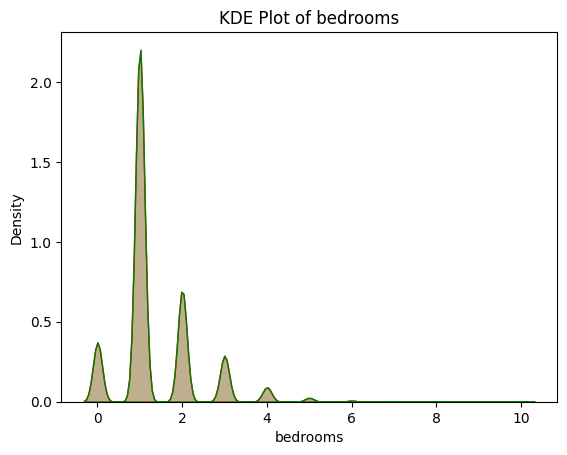

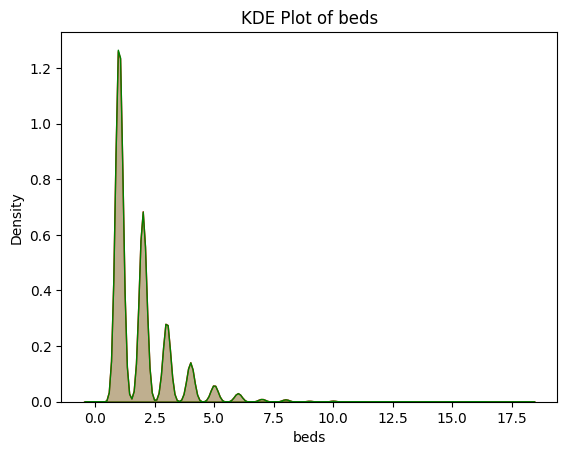

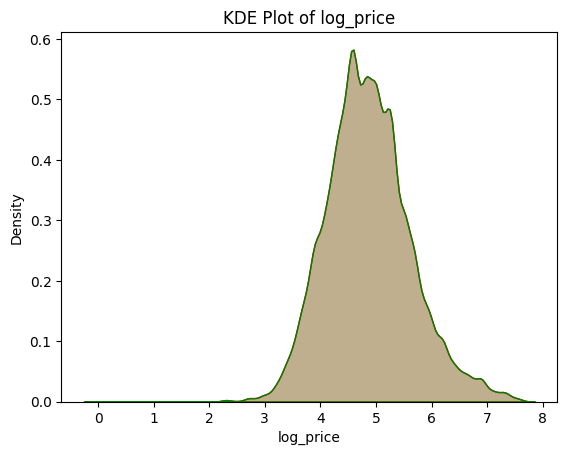

In [55]:
for col in df_2_numd.columns:
    plt.figure()
    sns.kdeplot(df_2_numd[col], fill=True, color='red')
    sns.kdeplot(df_2_numd_median[col], fill=True, color='green')
    plt.title('KDE Plot of ' + col)
    plt.show()

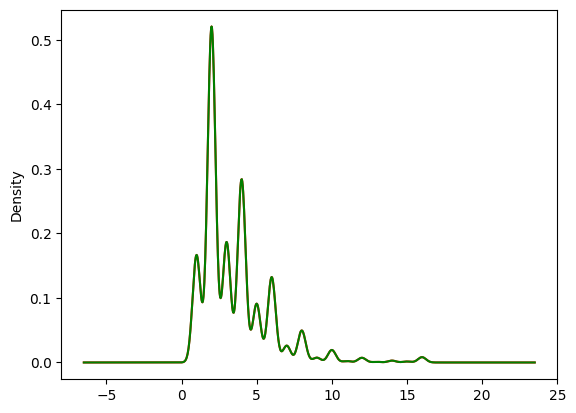

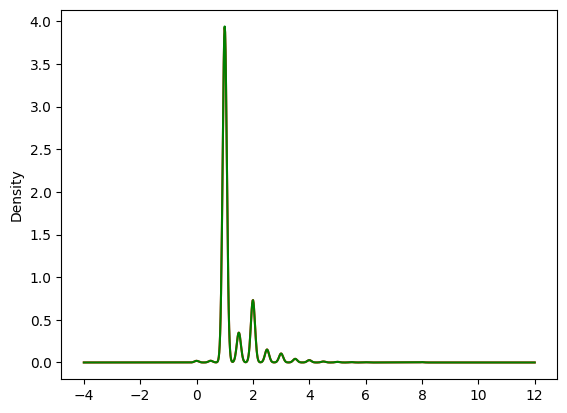

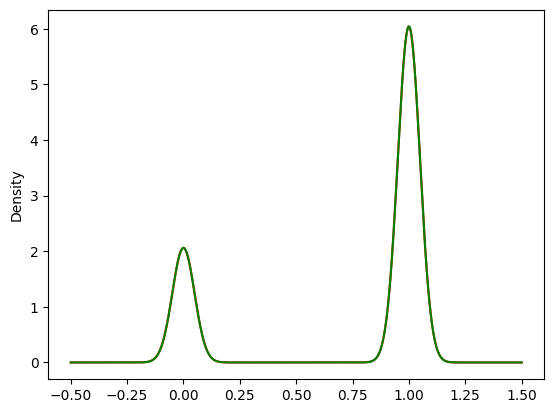

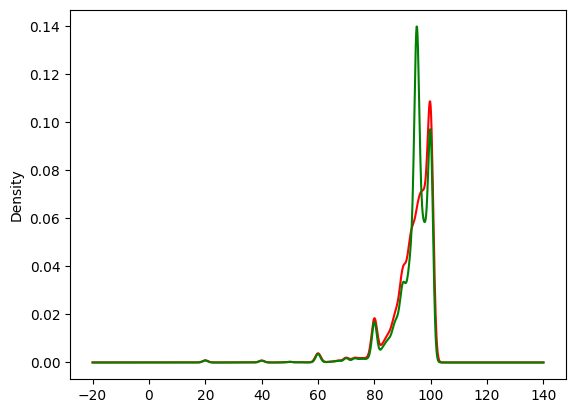

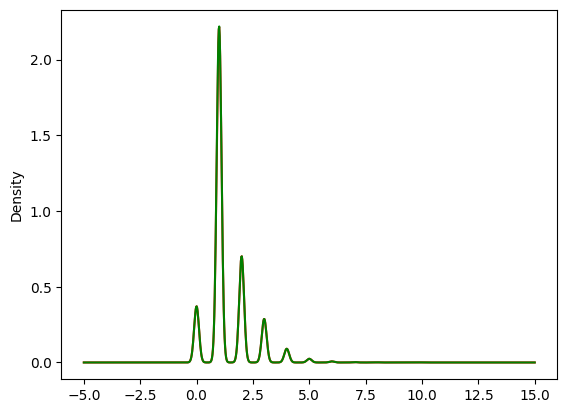

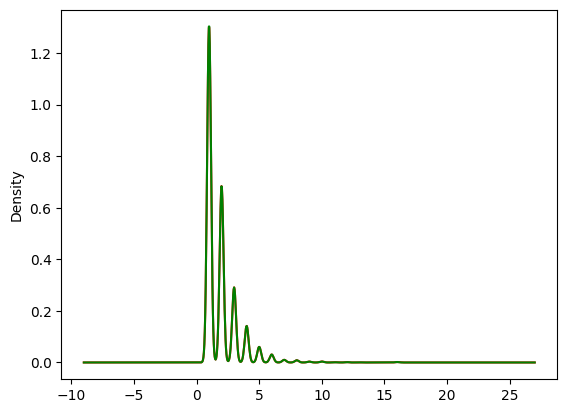

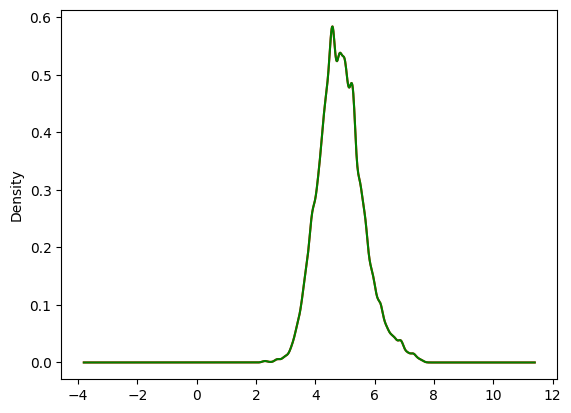

In [56]:
for col in nummeric_columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df_2_numd[col].plot.density(color='red')
    df_2_numd_median[col].plot.density(color='green')

In [57]:
df_2_numd_knn=df_2_numd.copy()

In [58]:

df_2_numd_knn.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                   NaN       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price  
0   1.0   5.010635  
1   3.0   5.129899  
2   3.0   4.976734  
3   2.0   6.620073  
4   1.0   4.744932

In [59]:
df_2_numd_knn.isnull().sum().sort_values(ascending=False)/df_2_numd.shape[0]*100

review_scores_rating    18.875769
bathrooms                0.360330
beds                     0.230981
bedrooms                 0.170002
cleaning_fee             0.007391
accommodates             0.005544
log_price                0.000000
dtype: float64

In [60]:
numeric_cols = df_2_numd_knn.select_dtypes(include=['number']).columns

# Step 3: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Step 4: Apply KNN imputer to numeric columns
df_2_numd_knn[numeric_cols] = imputer.fit_transform(df_2_numd_knn[numeric_cols])


In [61]:
df_2_numd_knn.isnull().sum()

accommodates            0
bathrooms               0
cleaning_fee            0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [62]:
df_2_numd_knn.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                  87.0       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price  
0   1.0   5.010635  
1   3.0   5.129899  
2   3.0   4.976734  
3   2.0   6.620073  
4   1.0   4.744932

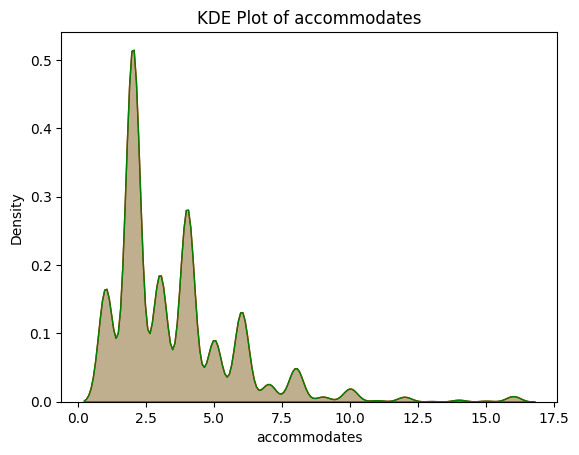

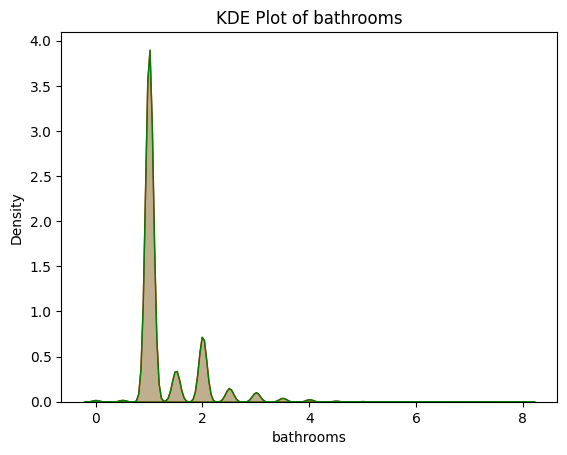

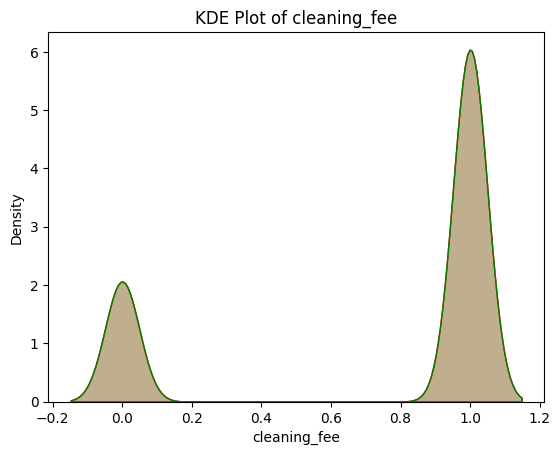

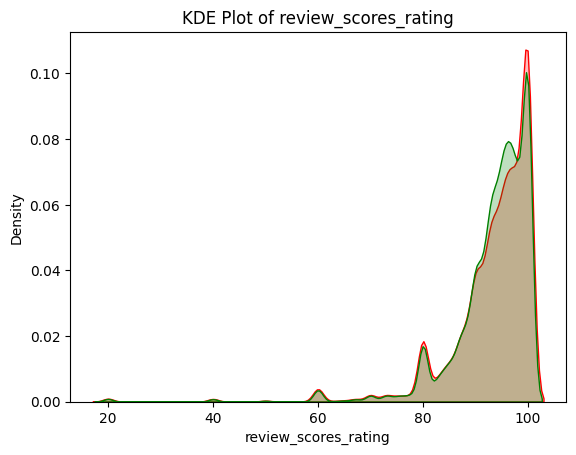

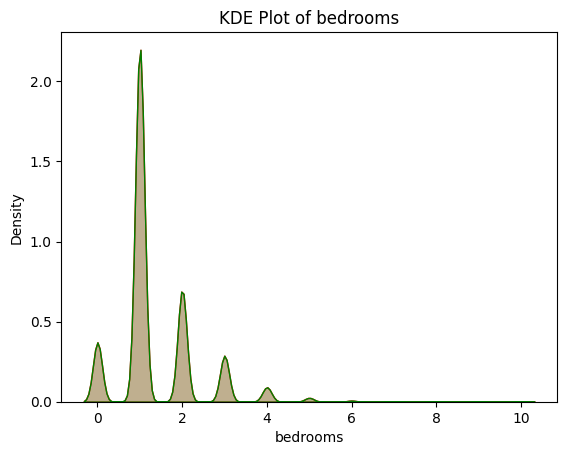

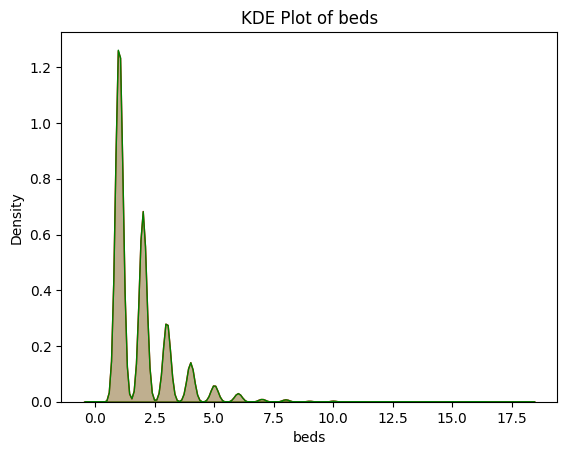

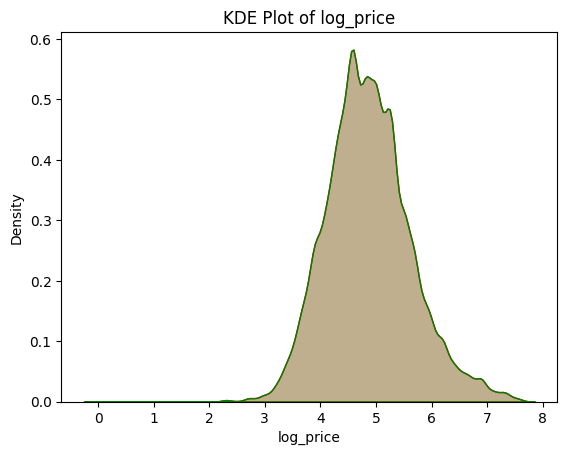

In [63]:
for col in df_2_numd.columns:
    plt.figure()
    sns.kdeplot(df_2_numd[col], fill=True, color='red')
    sns.kdeplot(df_2_numd_knn[col], fill=True, color='green')
    plt.title('KDE Plot of ' + col)
    plt.show()

In [64]:
df_2_numd_knn['review_scores_rating'].unique()

array([100. ,  93. ,  92. ,  87. ,  40. ,  97. ,  99. ,  90. ,  89. ,
        95.4,  91. ,  88. ,  86. ,  72. ,  98. ,  76.4,  95. ,  93.4,
        96. ,  88.8,  84. ,  90.6,  80. ,  84.2,  89.6,  91.6,  94. ,
        77.2,  92.8,  94.4,  96.8,  95.8,  85. ,  91.4,  96.6,  95.6,
        91.8,  70. ,  99.2,  91.2,  60. ,  81.4,  93.8,  88.6,  75. ,
        90.2,  92.2,  97.4,  20. ,  76. ,  93.6,  96.2,  80.6,  90.8,
        99.6,  94.2,  98.2,  92.6,  95.2,  88.2,  83. ,  82. ,  78. ,
        88.4,  94.8,  94.6,  97.8,  89.4,  96.4,  82.4,  84.4,  86.8,
        89.8,  82.6,  73. ,  98.4,  86.6,  55. ,  81. ,  98.8,  85.8,
        97.2,  87.2,  90.4,  86.2,  92.4,  84.8,  83.6,  89.2,  77. ,
        99.8,  93.2,  87.4,  87.6,  87.8,  97.6,  86.4,  81.8,  67. ,
        98.6,  68.4,  71. ,  83.4,  85.2,  79. ,  99.4,  83.2,  83.8,
        47. ,  74. ,  75.6,  73.6,  81.6,  68. ,  85.6,  76.6,  66. ,
        80.2,  78.6,  63. ,  50. ,  77.6,  78.8,  85.4,  53. ,  65. ,
        79.2,  82.2,

In [65]:
df_2_numd_knn['review_scores_rating'].describe(),df_2_numd_mean['review_scores_rating'].describe(),df_2_numd['review_scores_rating'].describe()

(count    54117.000000
 mean        93.288538
 std          7.772916
 min         20.000000
 25%         91.000000
 50%         95.000000
 75%         98.000000
 max        100.000000
 Name: review_scores_rating, dtype: float64,
 count    54117.000000
 mean        93.202041
 std          7.549785
 min         20.000000
 25%         92.000000
 50%         93.202041
 75%         98.000000
 max        100.000000
 Name: review_scores_rating, dtype: float64,
 count    43902.000000
 mean        93.202041
 std          8.382243
 min         20.000000
 25%         90.000000
 50%         95.000000
 75%         99.000000
 max        100.000000
 Name: review_scores_rating, dtype: float64)

In [66]:
df_2_numd_knn.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                  87.0       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price  
0   1.0   5.010635  
1   3.0   5.129899  
2   3.0   4.976734  
3   2.0   6.620073  
4   1.0   4.744932

In [67]:
df_obj.head()

room_type cancellation_policy instant_bookable
0  Entire home/apt              strict                f
1  Entire home/apt              strict                t
2  Entire home/apt            moderate                t
3  Entire home/apt            flexible                f
4  Entire home/apt            moderate                t

In [68]:
df_new = pd.concat([df_2_numd_knn, df_obj], axis=1)

In [69]:
df_new.shape


(54117, 10)

In [70]:
df_new.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                  87.0       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price        room_type cancellation_policy instant_bookable  
0   1.0   5.010635  Entire home/apt              strict                f  
1   3.0   5.129899  Entire home/apt              strict                t  
2   3.0   4.976734  Entire home/apt            moderate                t  
3   2.0   6.620073  Entire home/apt            flexible                f  
4   1.0   4.744932  Entire home/apt            moderate                t

In [71]:
df_new.isnull().mean()*100

accommodates            0.0
bathrooms               0.0
cleaning_fee            0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
room_type               0.0
cancellation_policy     0.0
instant_bookable        0.0
dtype: float64

In [72]:
for col in df_new.columns:
    print(f"Unique values in {col}:")
    print(df_new[col].unique())
    print()

Unique values in accommodates:
[ 3.   7.   5.   4.   2.   6.   8.   1.   9.  10.  16.   1.6 11.  12.
 14.  13.  15. ]

Unique values in bathrooms:
[1.  1.5 2.  1.3 2.5 3.  0.5 4.5 5.  0.  4.  1.1 3.5 1.4 1.2 5.5 7.5 6.
 1.7 8.  7.  6.5 0.9 1.9 1.6 2.7 0.7 2.1 2.4 2.3 1.8 3.4 0.8]

Unique values in cleaning_fee:
[1.  0.  0.4 0.6]

Unique values in review_scores_rating:
[100.   93.   92.   87.   40.   97.   99.   90.   89.   95.4  91.   88.
  86.   72.   98.   76.4  95.   93.4  96.   88.8  84.   90.6  80.   84.2
  89.6  91.6  94.   77.2  92.8  94.4  96.8  95.8  85.   91.4  96.6  95.6
  91.8  70.   99.2  91.2  60.   81.4  93.8  88.6  75.   90.2  92.2  97.4
  20.   76.   93.6  96.2  80.6  90.8  99.6  94.2  98.2  92.6  95.2  88.2
  83.   82.   78.   88.4  94.8  94.6  97.8  89.4  96.4  82.4  84.4  86.8
  89.8  82.6  73.   98.4  86.6  55.   81.   98.8  85.8  97.2  87.2  90.4
  86.2  92.4  84.8  83.6  89.2  77.   99.8  93.2  87.4  87.6  87.8  97.6
  86.4  81.8  67.   98.6  68.4  71.   83.4  85

# outlier treatment

Choosing the Method:
Z-score and IQR methods are effective for numerical data when you want to identify outliers based on statistical thresholds.

Boxplots and scatter plots are useful for visual inspection and can give insights into which data points might be outliers based on their position relative to others.

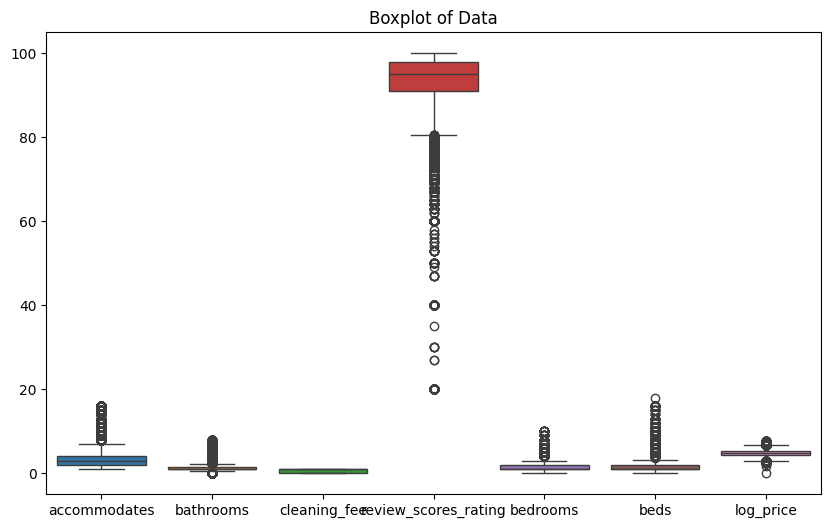

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new)
plt.title('Boxplot of Data')
plt.show()

In [74]:
df_new.head(5)

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0                 100.0       1.0   
1           7.0        1.0           1.0                  93.0       3.0   
2           5.0        1.0           1.0                  92.0       1.0   
3           4.0        1.0           1.0                  87.0       2.0   
4           2.0        1.0           1.0                  40.0       0.0   

   beds  log_price        room_type cancellation_policy instant_bookable  
0   1.0   5.010635  Entire home/apt              strict                f  
1   3.0   5.129899  Entire home/apt              strict                t  
2   3.0   4.976734  Entire home/apt            moderate                t  
3   2.0   6.620073  Entire home/apt            flexible                f  
4   1.0   4.744932  Entire home/apt            moderate                t

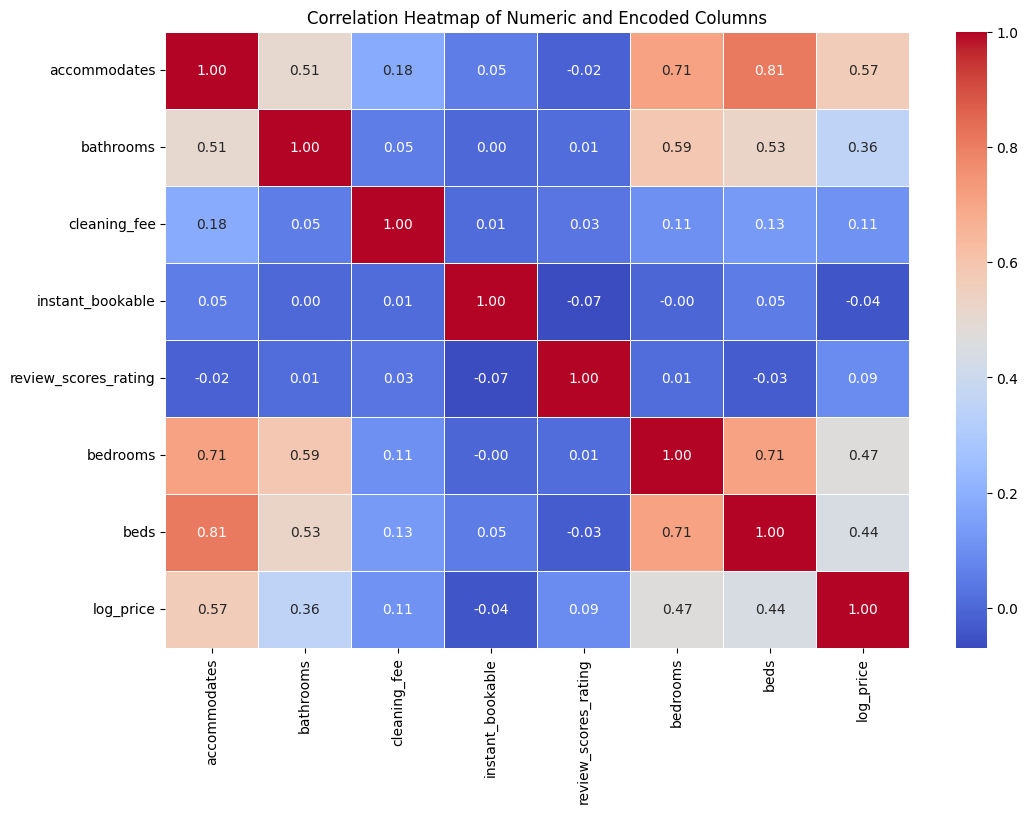

In [75]:

df_new = df.copy()
df_new['instant_bookable'] = df_new['instant_bookable'].map({'t': 1, 'f': 0})
df_new = pd.get_dummies(df_new, columns=['room_type', 'cancellation_policy'], drop_first=True)
numeric_df_new = df_new.select_dtypes(include=[float, int])
correlation_matrix = numeric_df_new.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric and Encoded Columns')
plt.show()


In [76]:
def scatter_plot_outliers(df_new, x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_new[x_column], df_new[y_column], color='blue', edgecolor='k', alpha=0.7)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

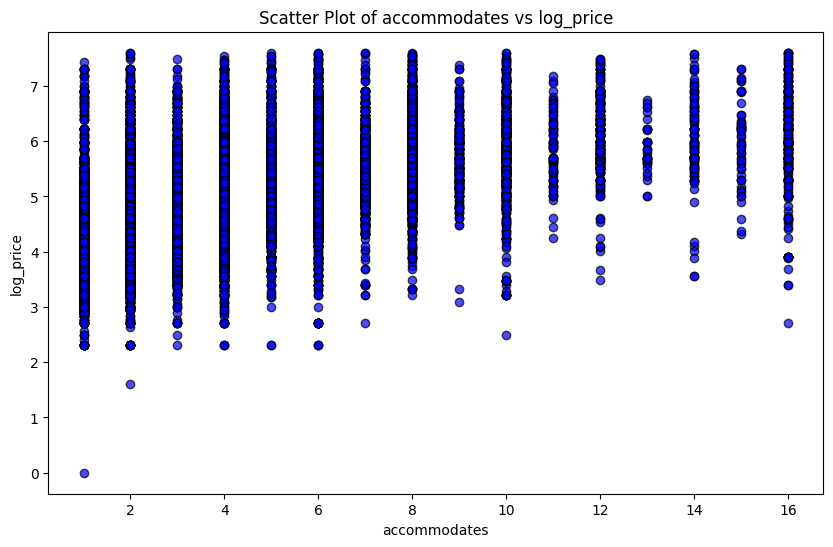

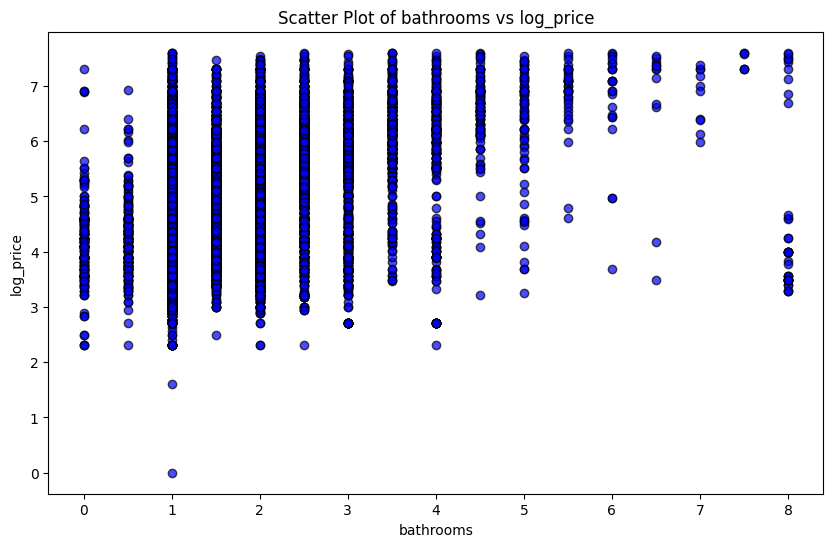

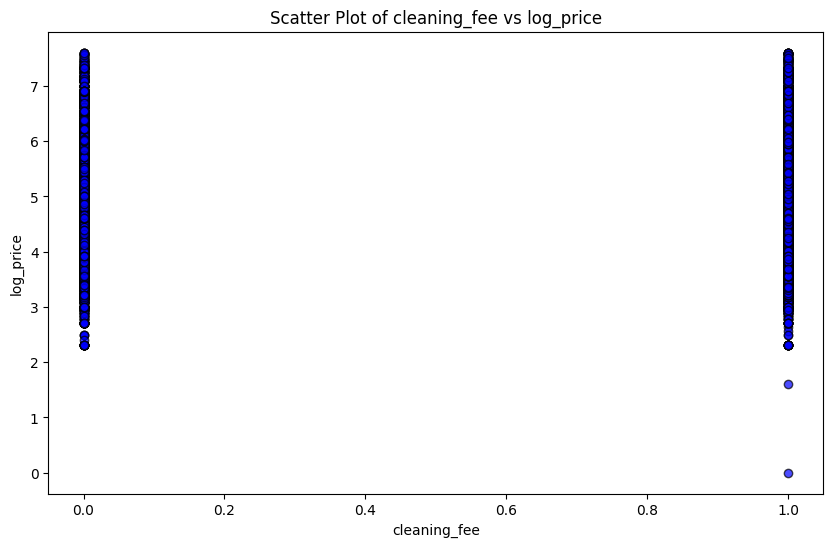

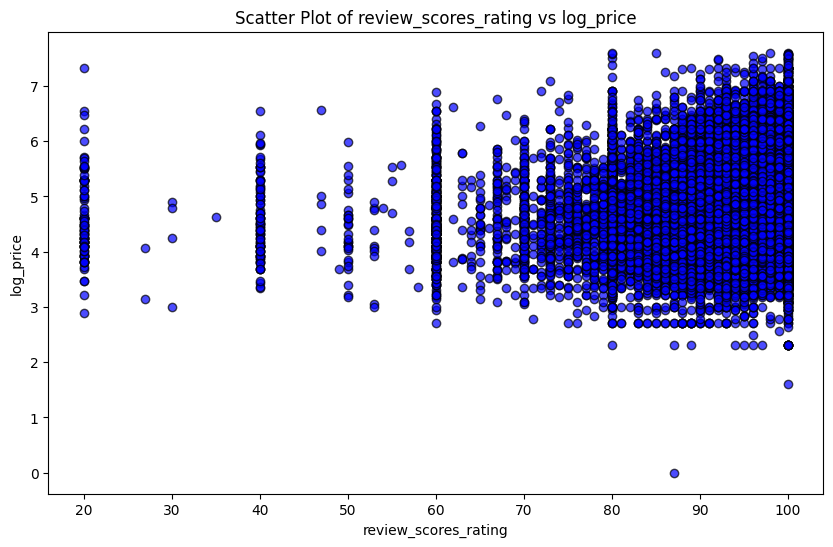

In [77]:
scatter_plot_outliers(df_new, 'accommodates', 'log_price')
scatter_plot_outliers(df_new, 'bathrooms', 'log_price')
scatter_plot_outliers(df_new, 'cleaning_fee', 'log_price')
scatter_plot_outliers(df_new, 'review_scores_rating', 'log_price')

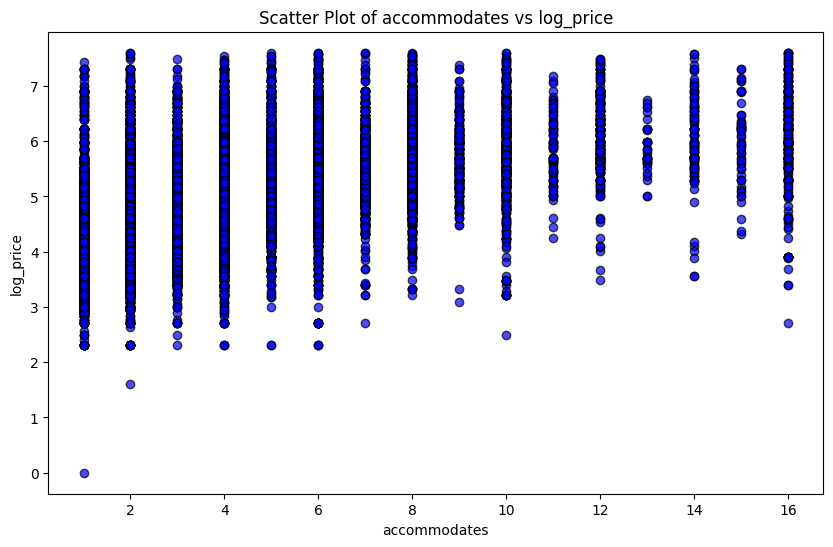

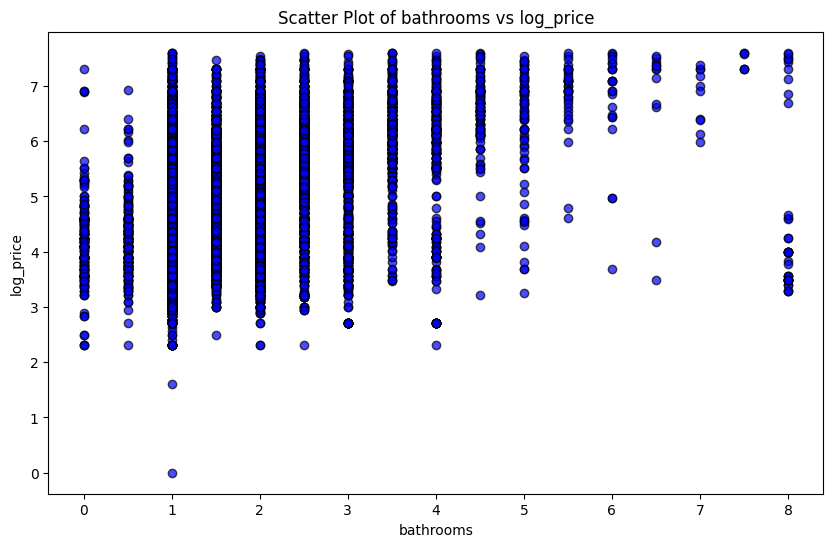

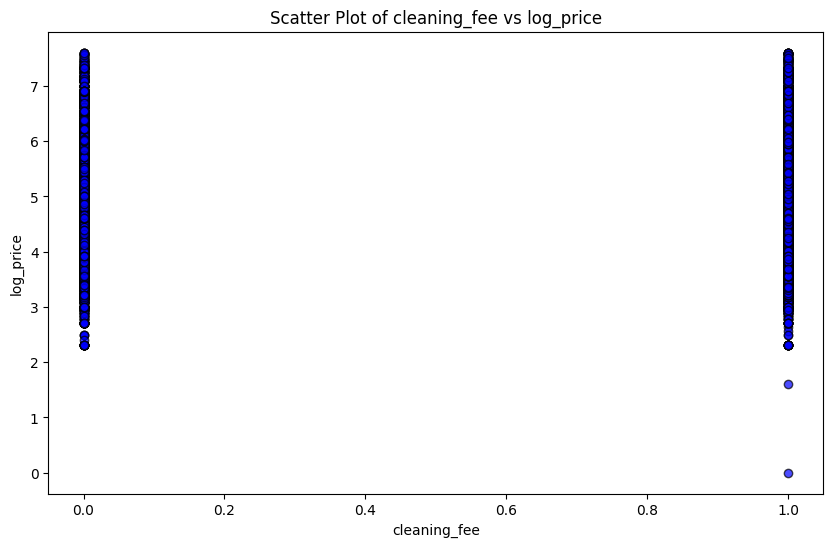

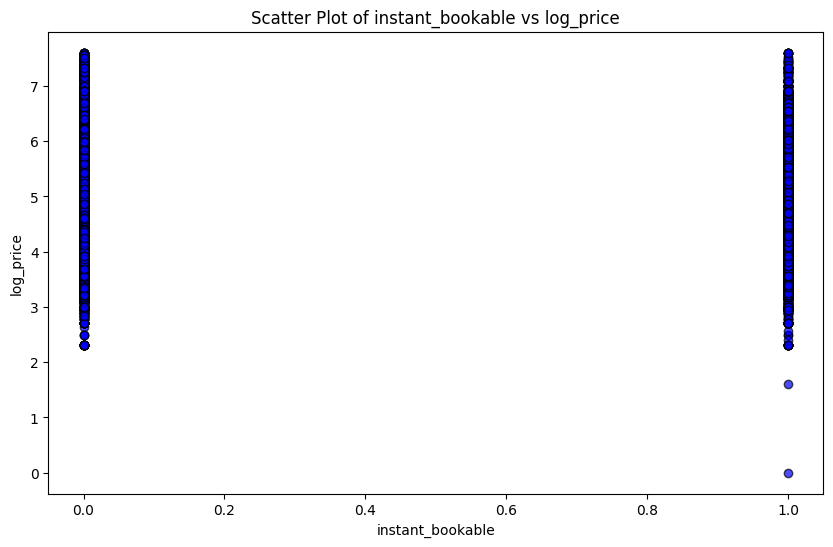

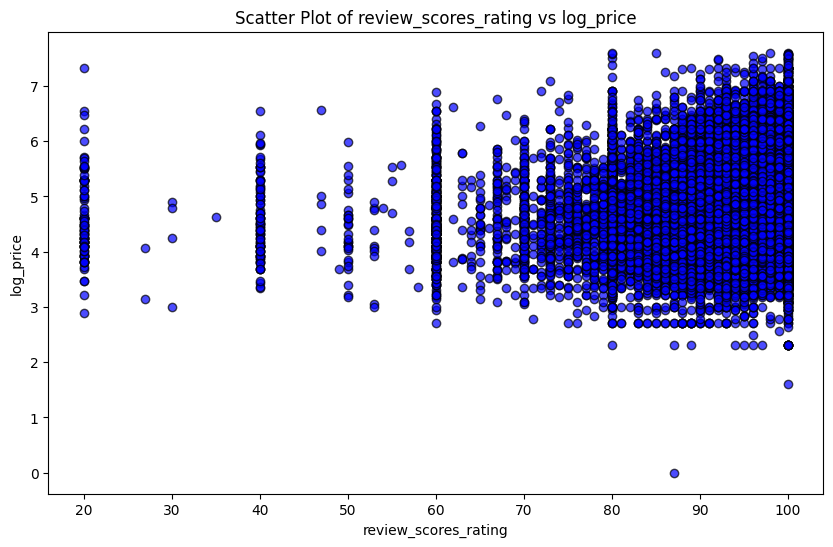

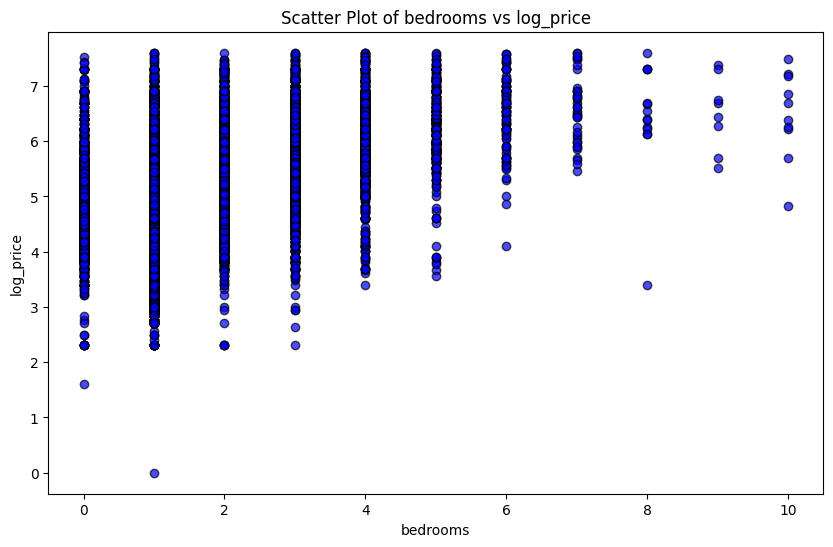

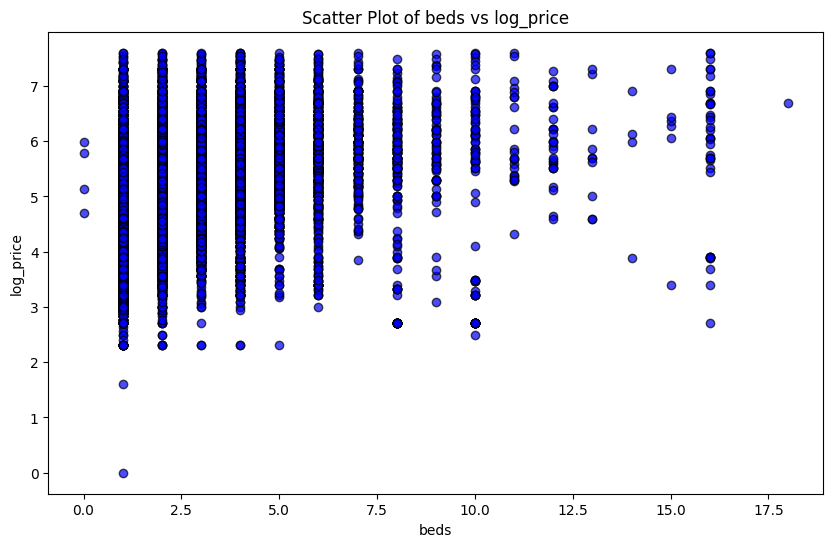

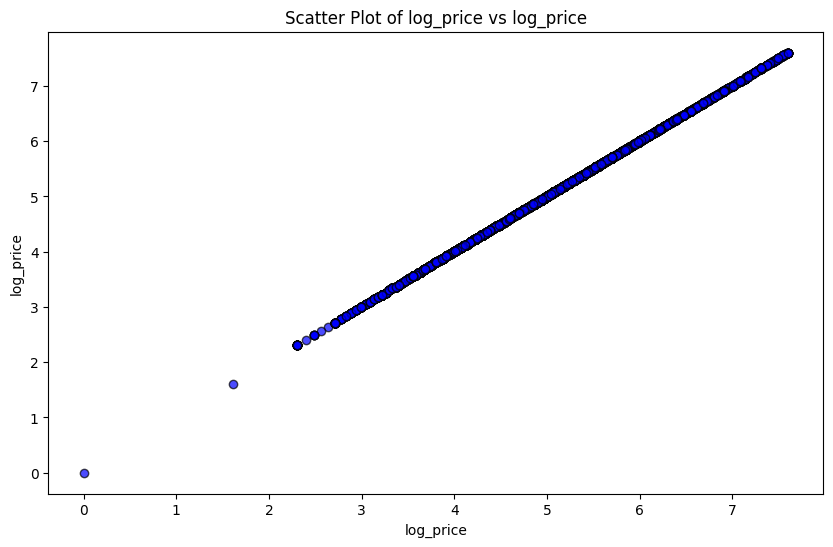

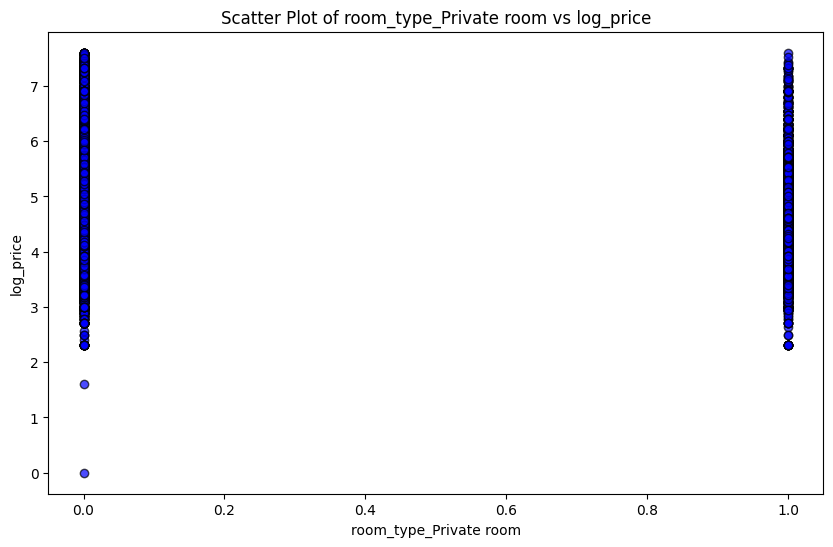

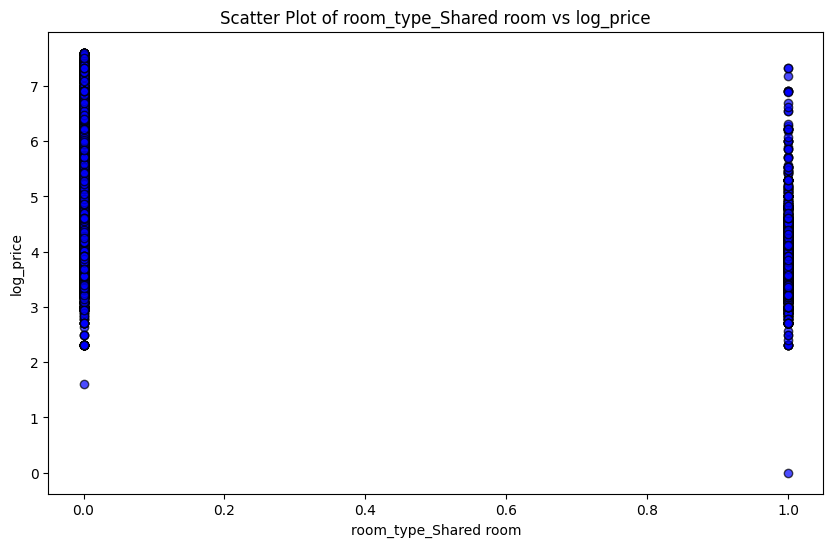

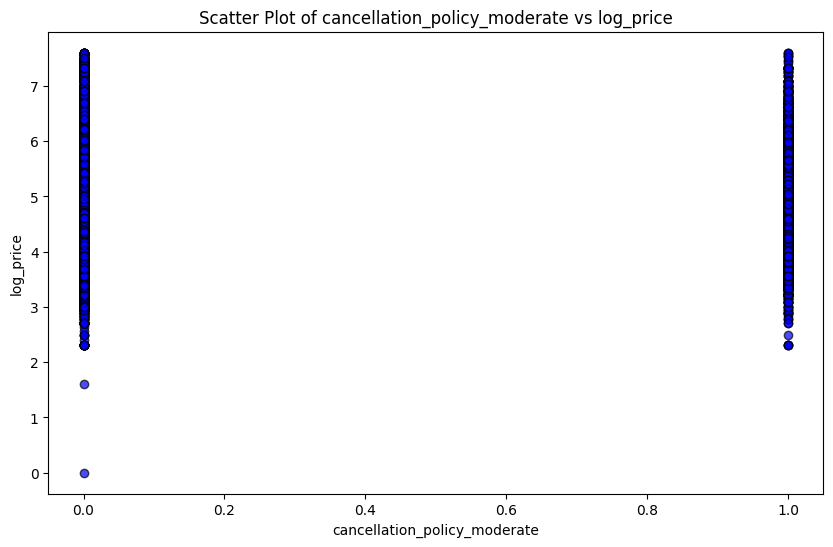

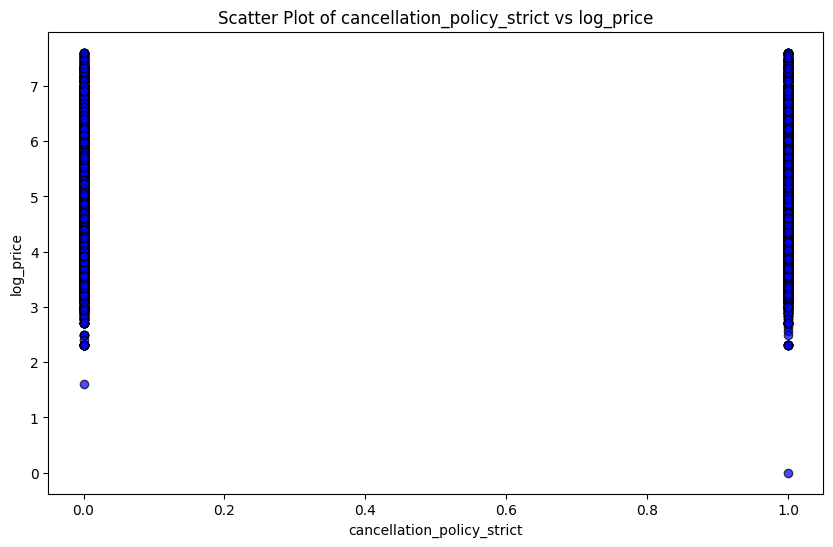

In [78]:
columns_to_plot=df_new.columns
# Loop through the columns and create scatter plots
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_new[col], df_new['log_price'], color='blue', edgecolor='k', alpha=0.7)
    plt.title(f'Scatter Plot of {col} vs log_price')
    plt.xlabel(col)
    plt.ylabel('log_price')
    plt.show()

# data analysis univarient catogerical columns

In [79]:
df_obj.head()


room_type cancellation_policy instant_bookable
0  Entire home/apt              strict                f
1  Entire home/apt              strict                t
2  Entire home/apt            moderate                t
3  Entire home/apt            flexible                f
4  Entire home/apt            moderate                t

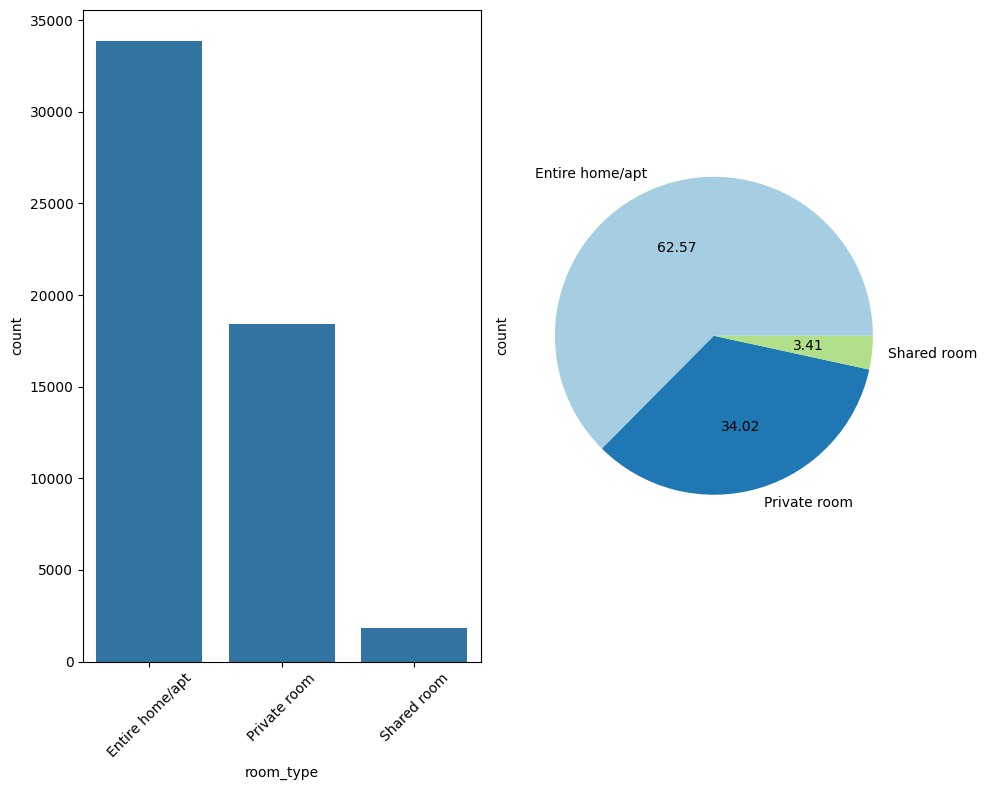

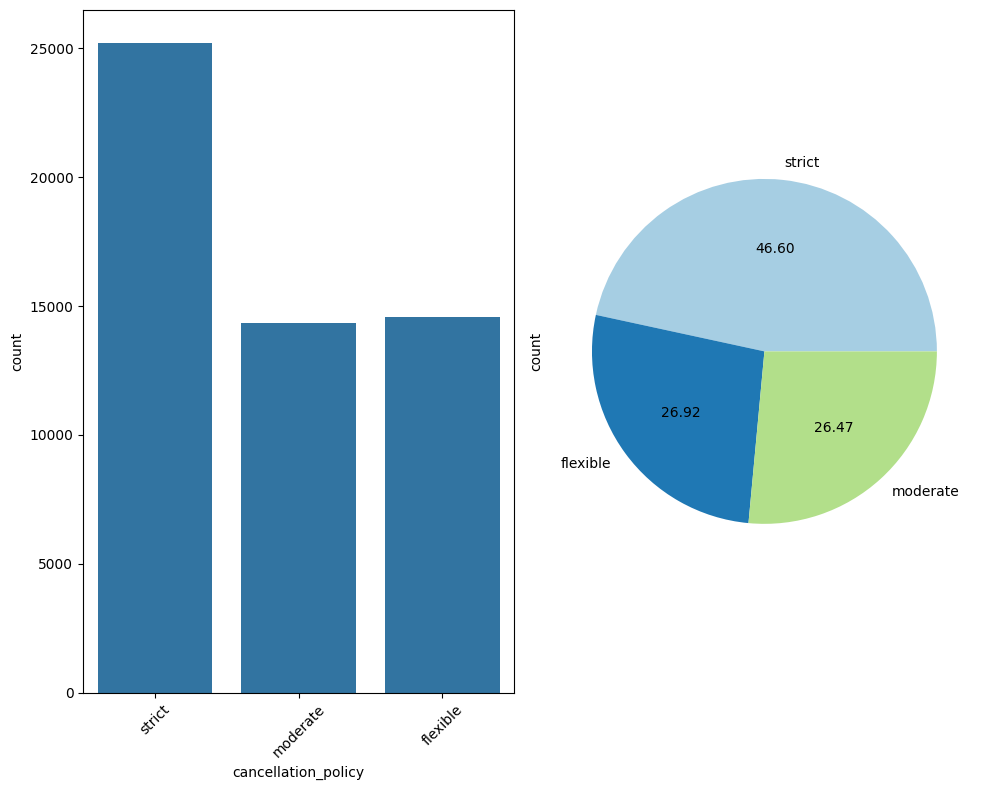

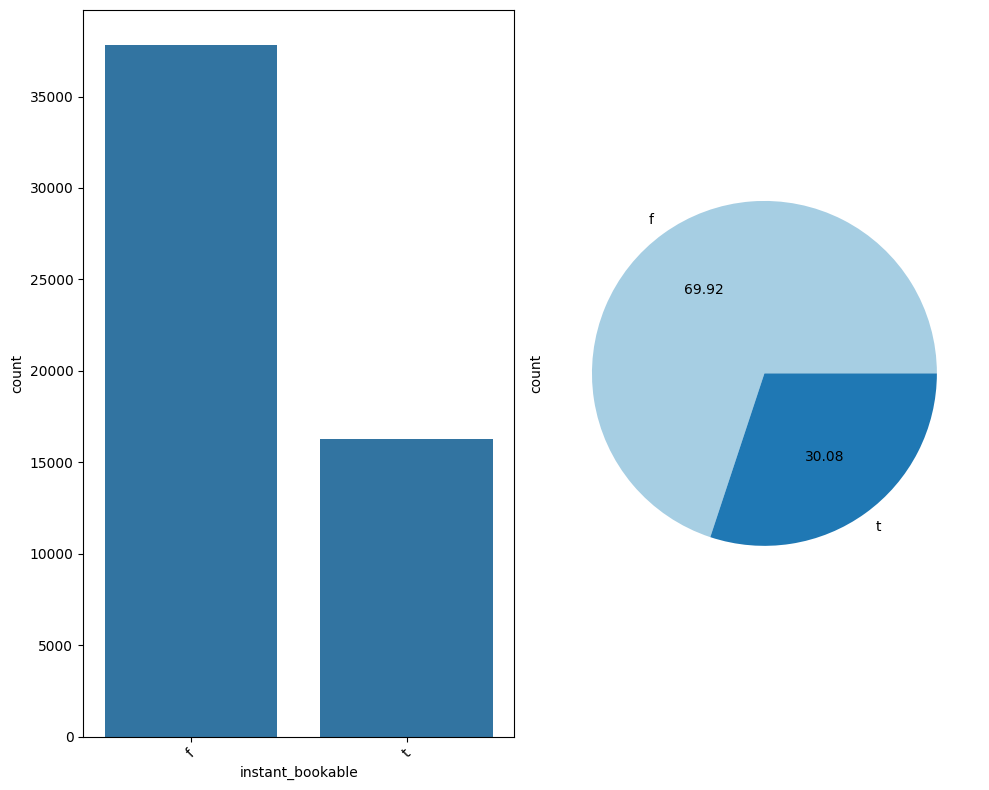

In [80]:
for col in df_obj.columns:
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.countplot(x=df_obj[col])
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    #df_obj[col].value_counts().plot(kind='pie',autopct='%.2f')
    df_obj[col].value_counts().plot(kind='pie', autopct='%.2f', colors=plt.cm.Paired.colors)
    
    plt.tight_layout()
    plt.show()

# univeriant analysis in numeric columns

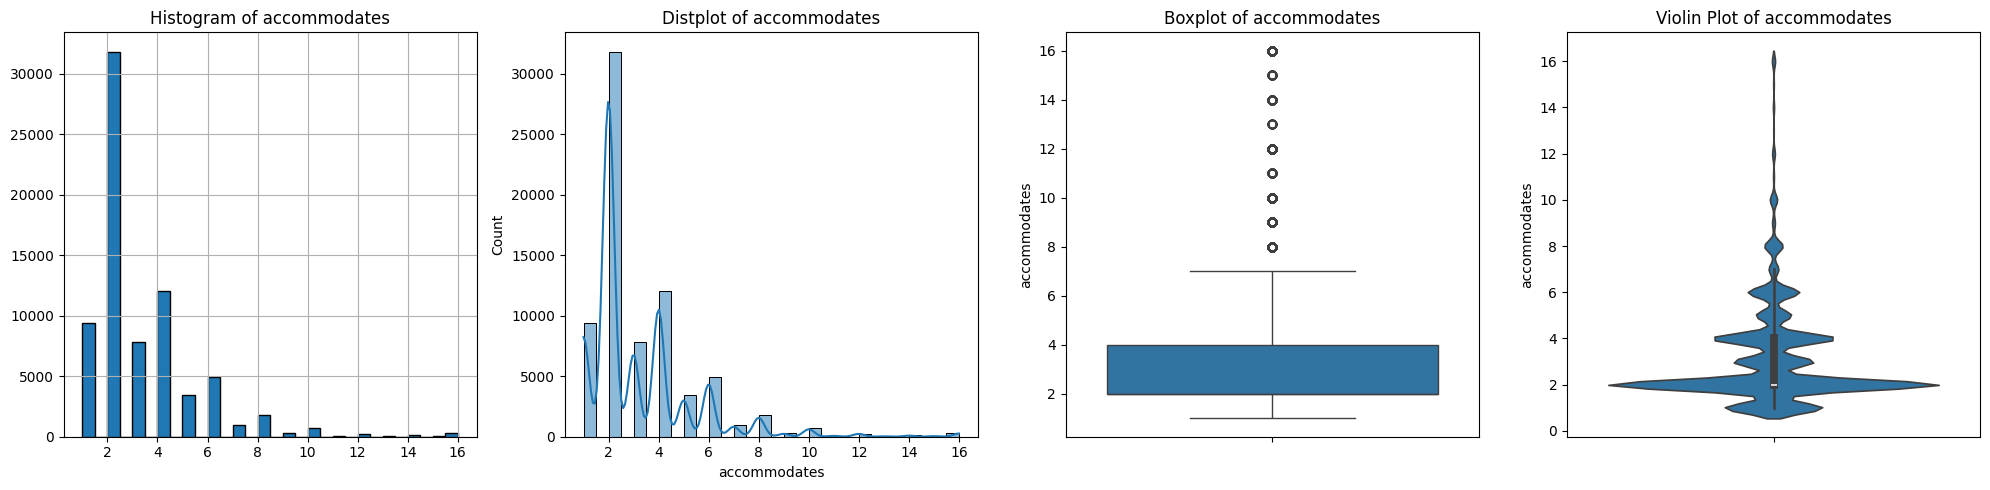

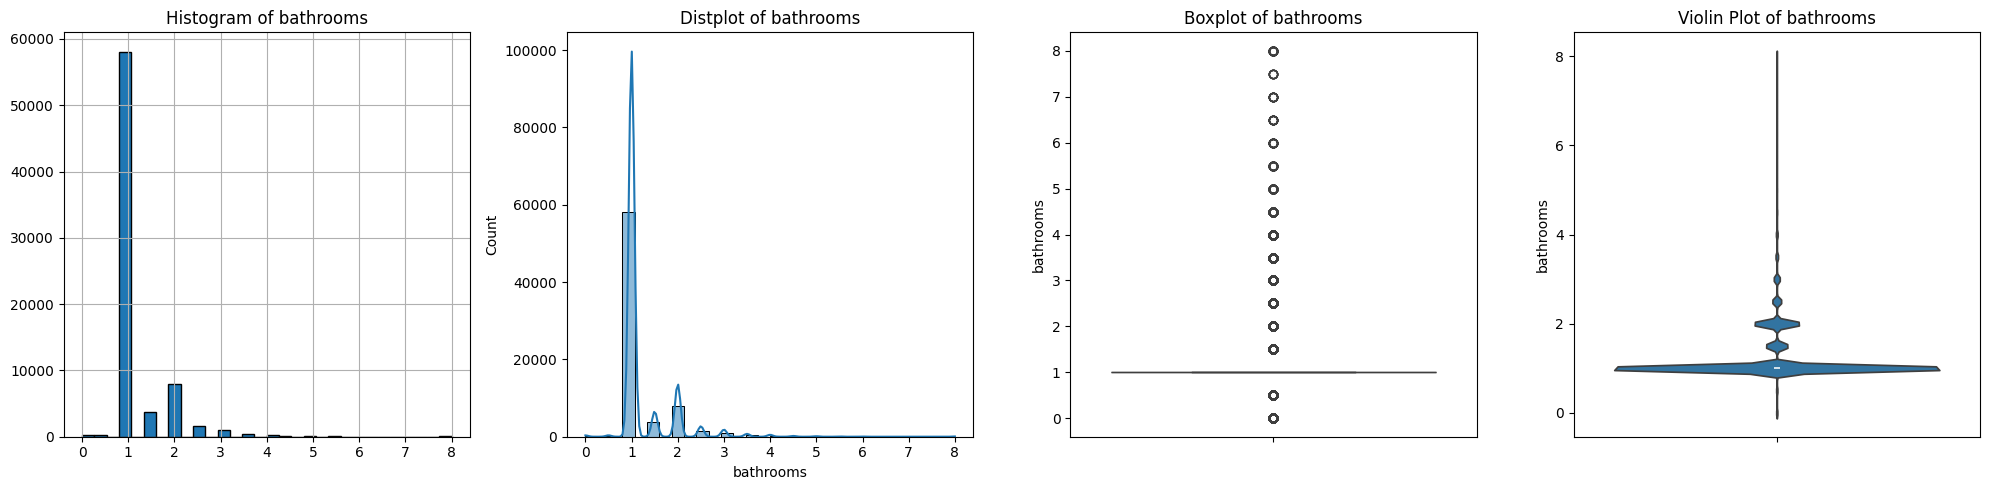

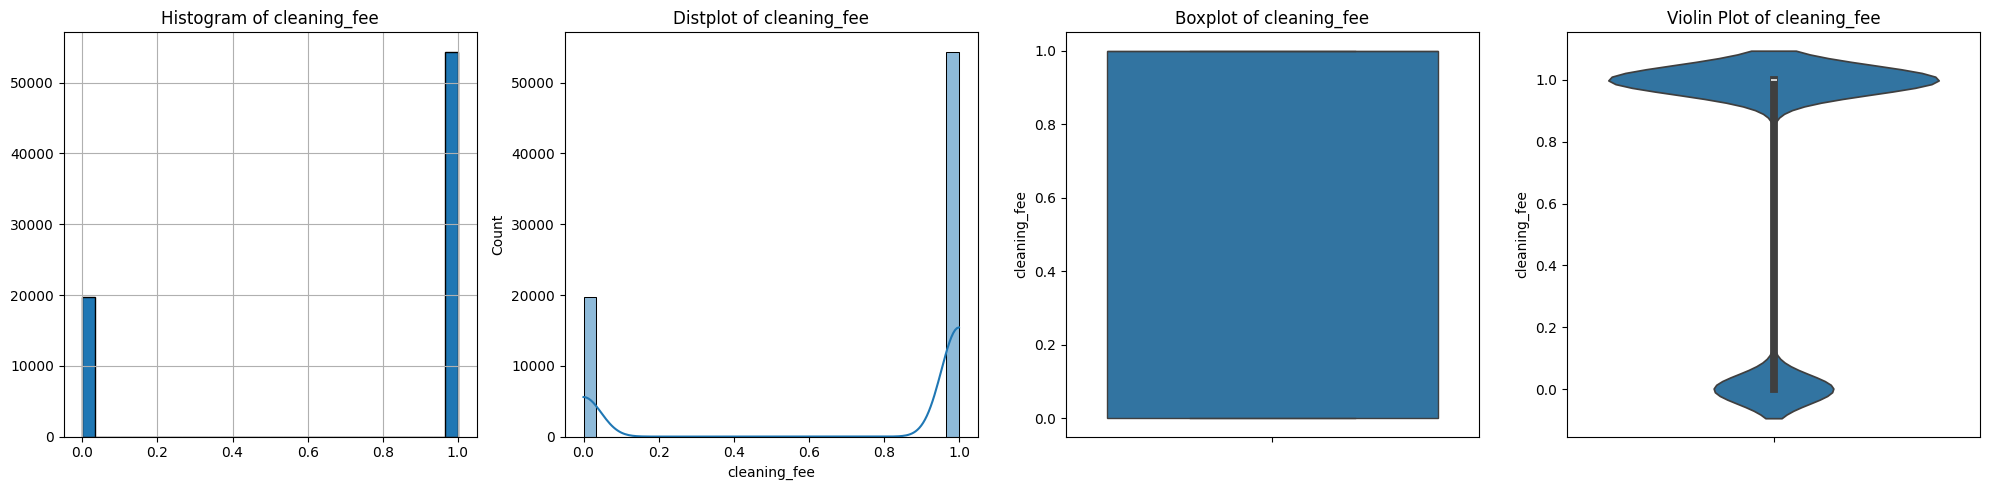

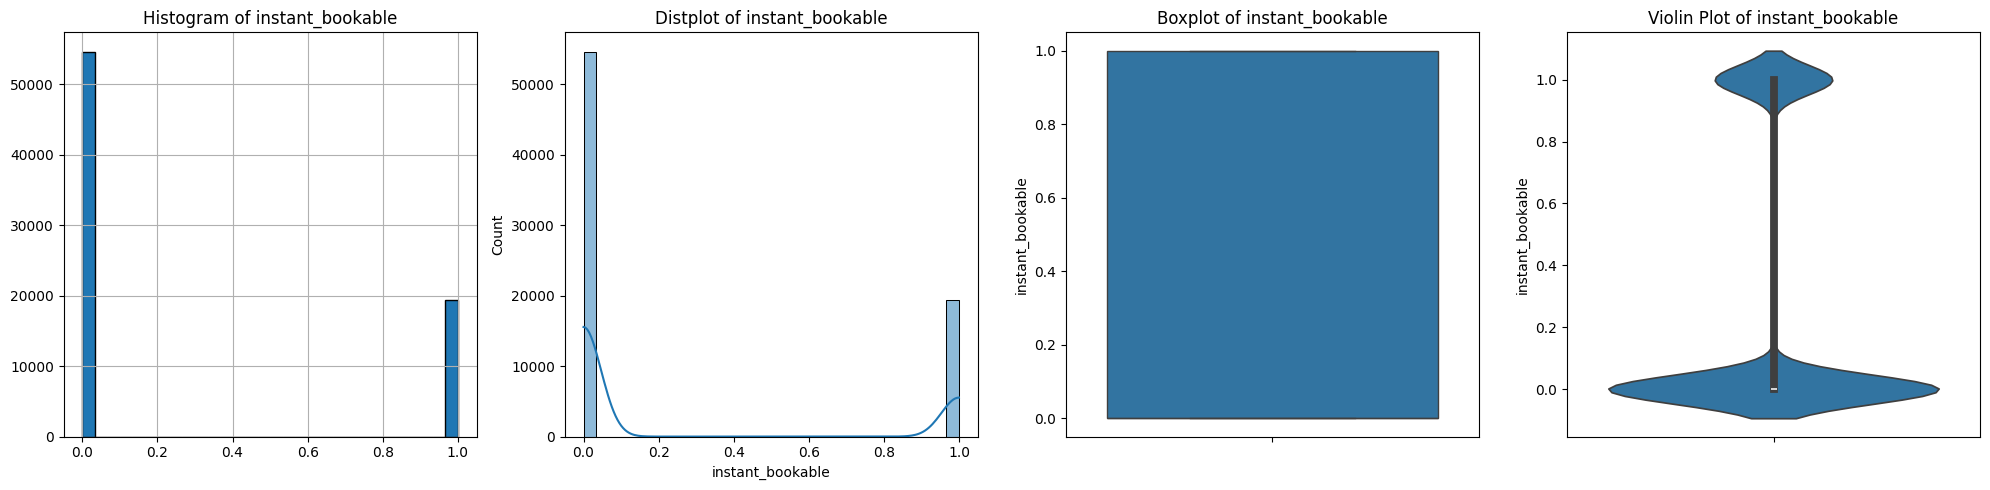

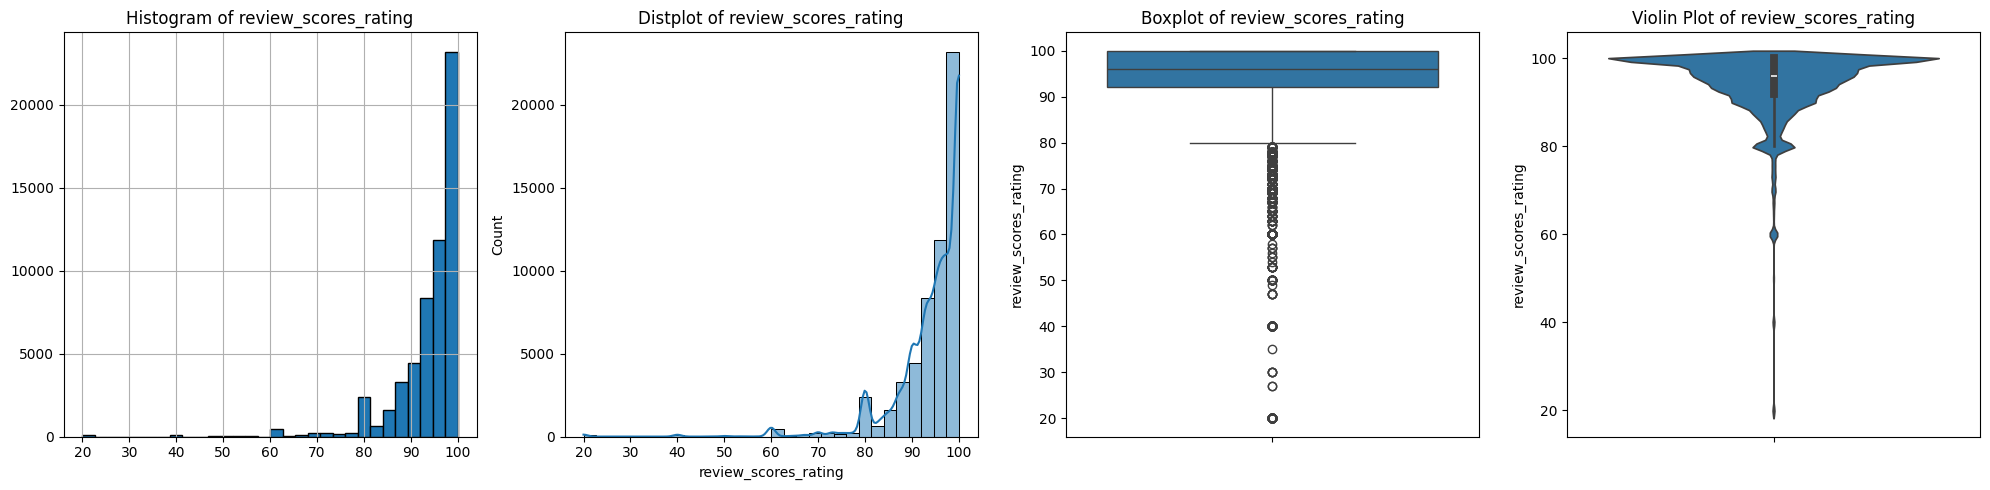

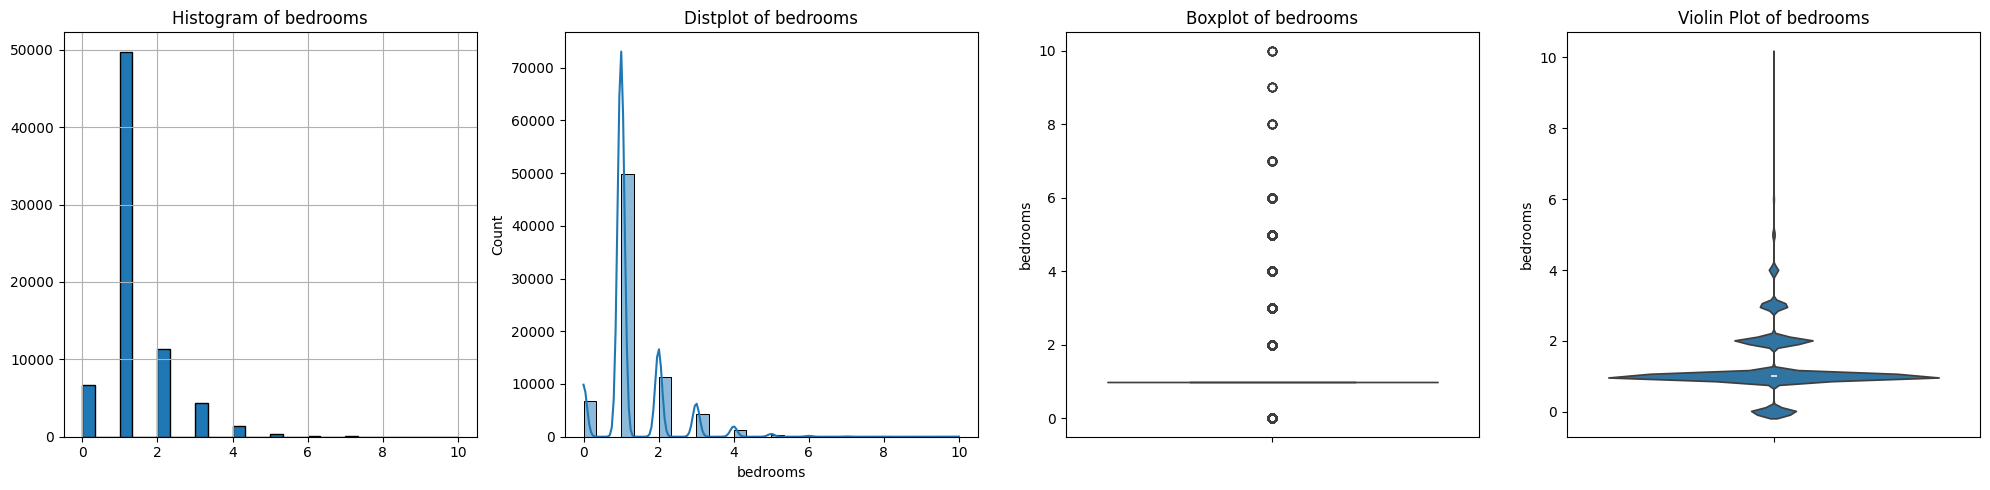

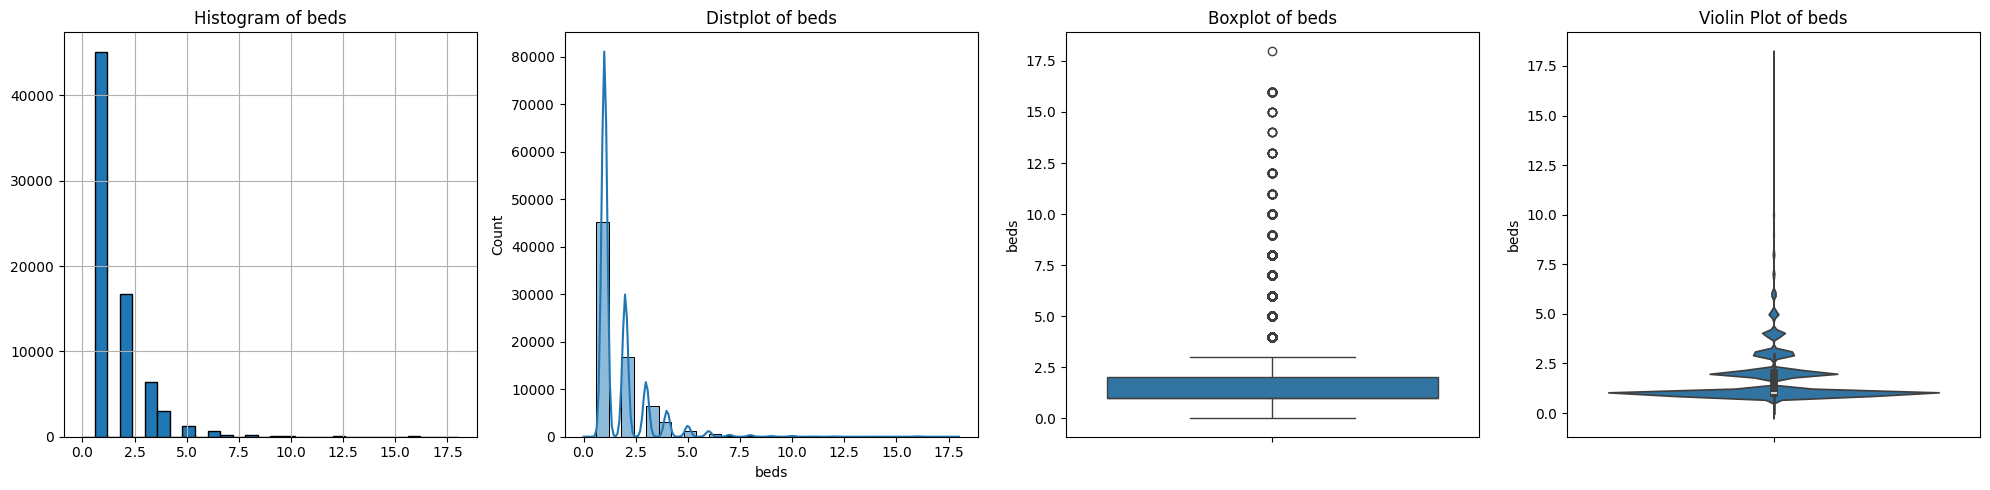

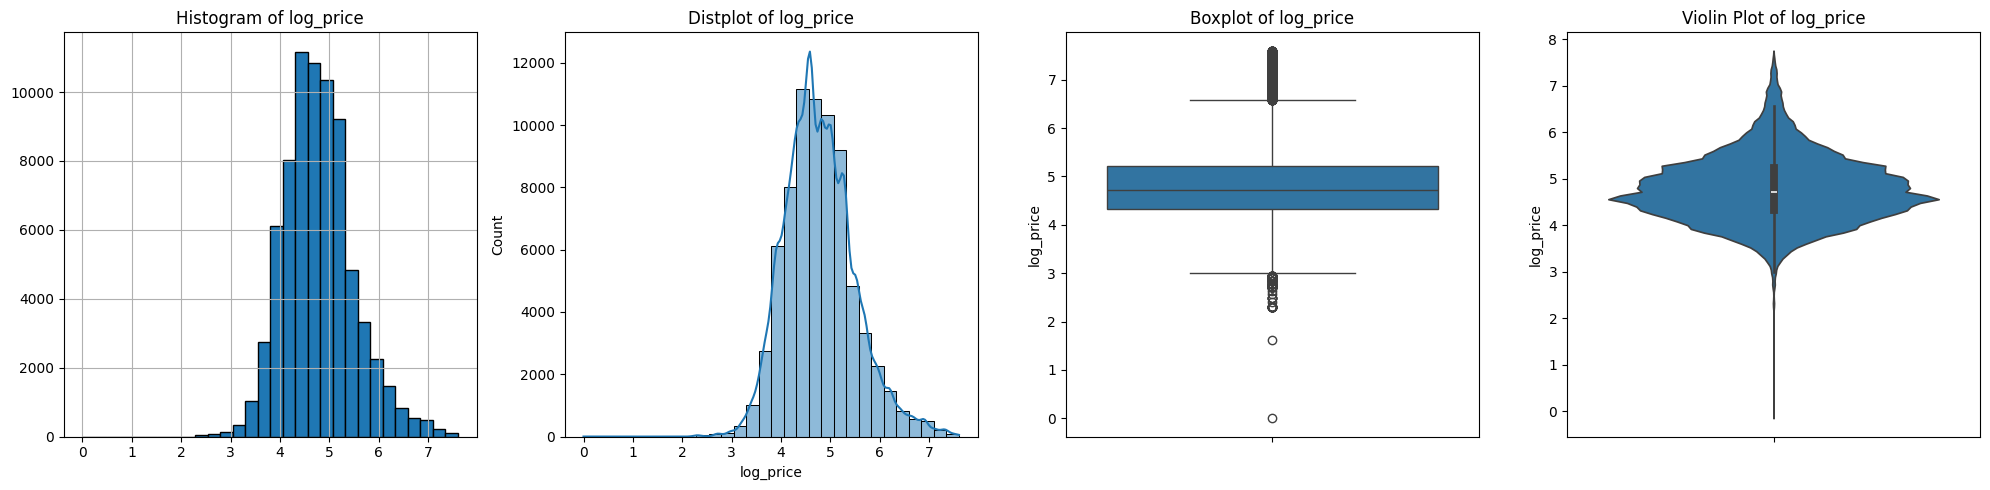

In [81]:
for col in df_new.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(20, 5))
    
    # Histogram
    plt.subplot(1, 4, 1)
    df_new[col].hist(bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    
    # Distplot
    plt.subplot(1, 4, 2)
    sns.histplot(df_new[col], kde=True, bins=30)
    plt.title(f'Distplot of {col}')
    
    # Boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df_new[col])
    plt.title(f'Boxplot of {col}')
    
    # Violin Plot
    plt.subplot(1, 4, 4)
    sns.violinplot(y=df_new[col])
    plt.title(f'Violin Plot of {col}')
    
    plt.tight_layout()
    plt.show()

Accommodates - Mean: 3.1551249527716307, Median: 2.0, Mode: 2.0


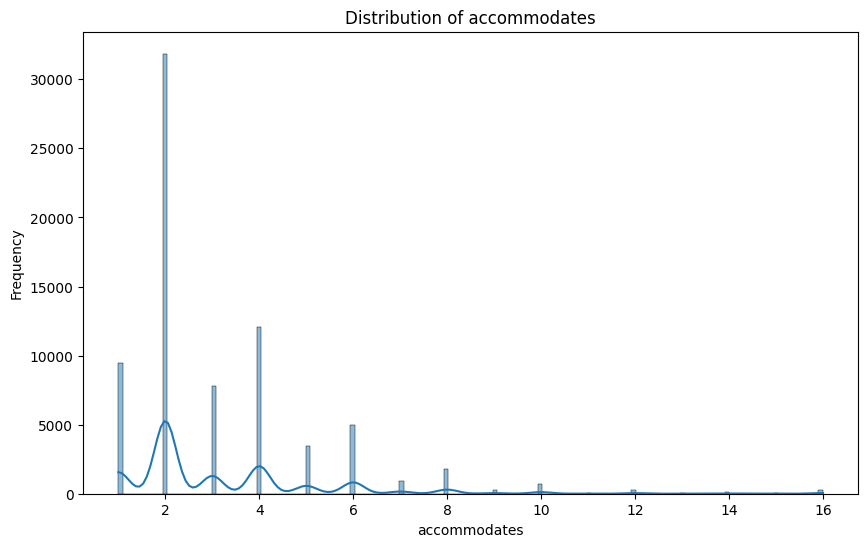

Bathrooms - Mean: 1.2352722303404233, Median: 1.0, Mode: 1.0


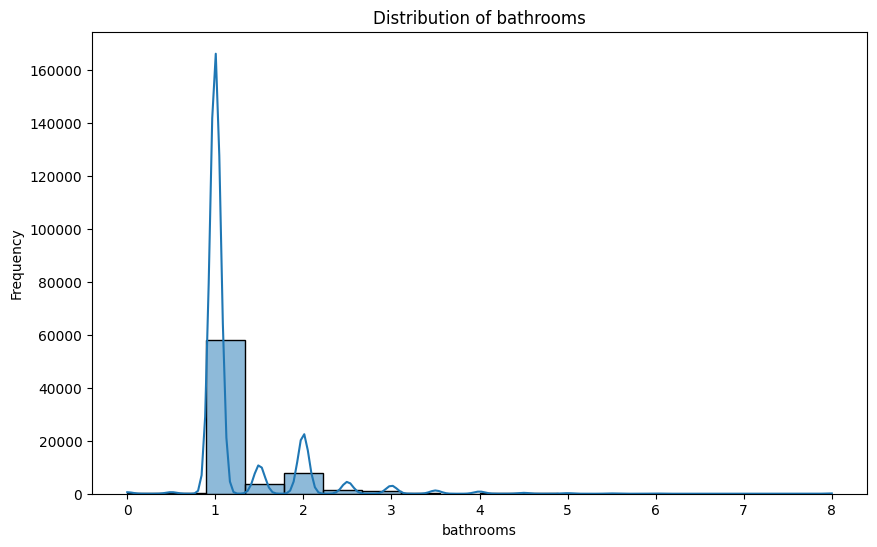

Cleaning Fee - Mean: 0.7340602102365499, Median: 1.0, Mode: 1.0


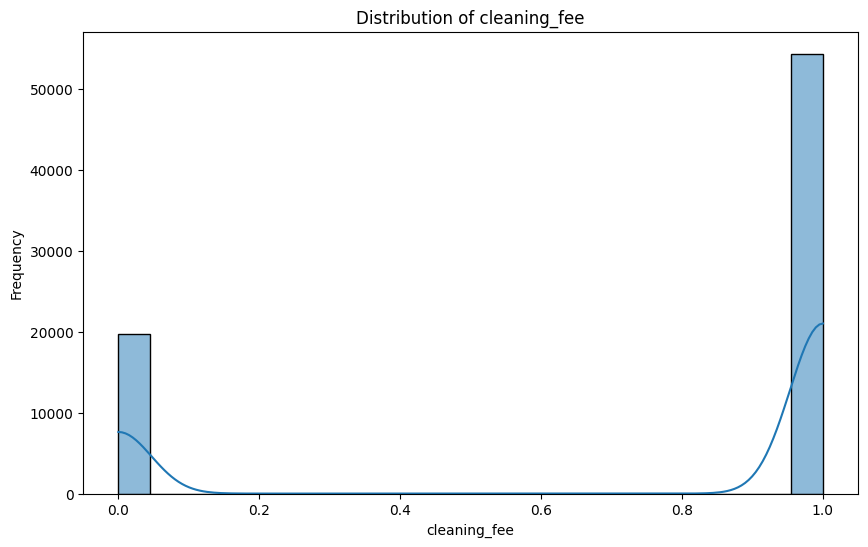

Review Scores Rating - Mean: 94.06736482601195, Median: 96.0, Mode: 100.0, Missing Values: 16722


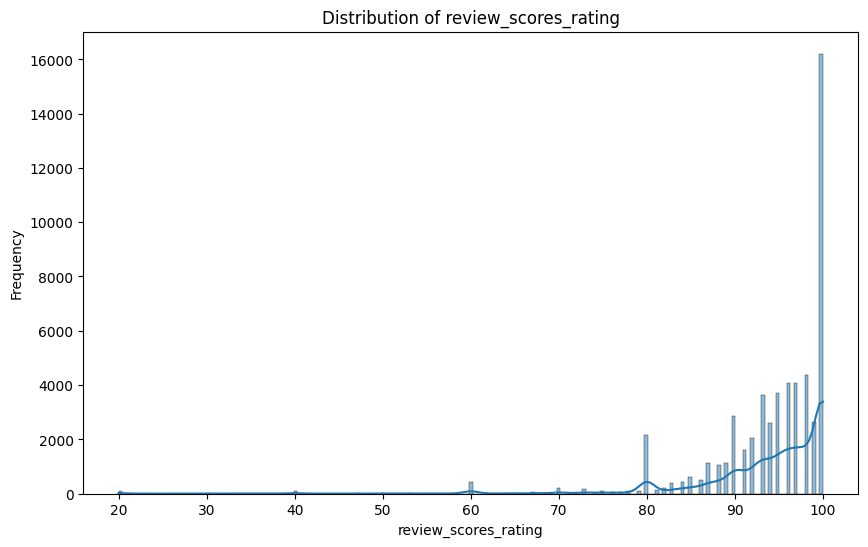

Bedrooms - Mean: 1.2657966197868116, Median: 1.0, Mode: 1.0


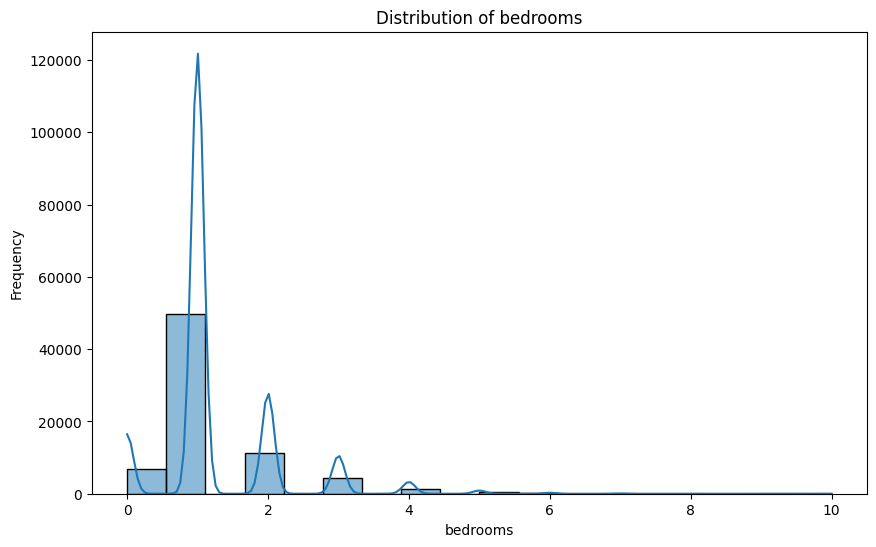

Beds - Mean: 1.710867802108678, Median: 1.0, Mode: 1.0


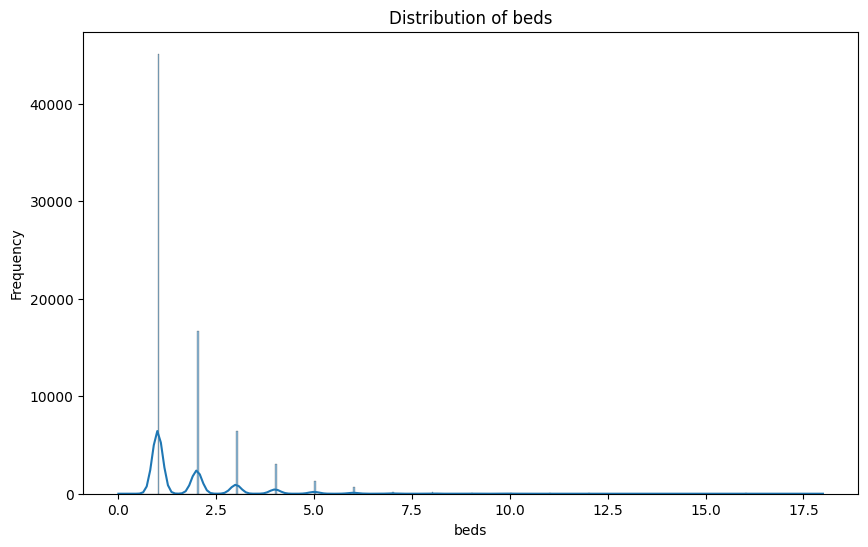

Log Price - Mean: 4.78206910829221, Median: 4.709530201, Mode: 5.010635294


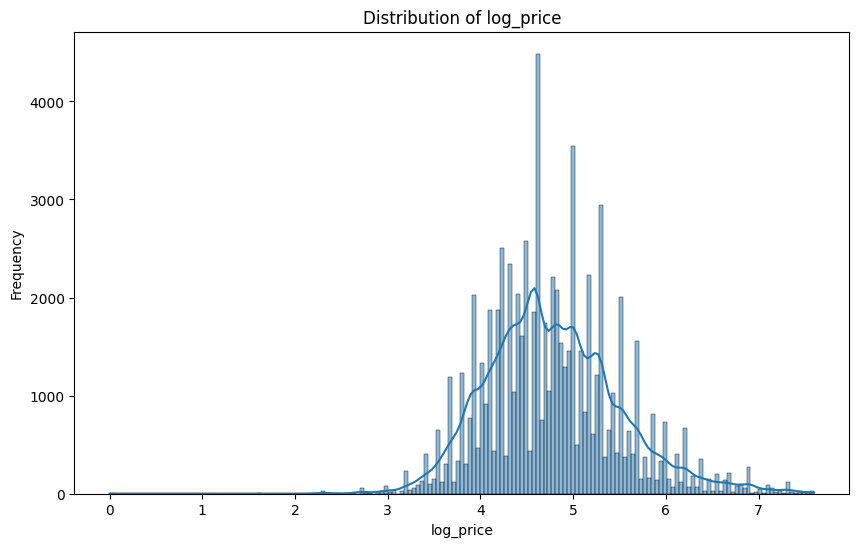

In [82]:
def plot_histogram(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Accommodates
print(f"Accommodates - Mean: {df['accommodates'].mean()}, Median: {df['accommodates'].median()}, Mode: {df['accommodates'].mode()[0]}")
plot_histogram('accommodates')

# Bathrooms
print(f"Bathrooms - Mean: {df['bathrooms'].mean()}, Median: {df['bathrooms'].median()}, Mode: {df['bathrooms'].mode()[0]}")
plot_histogram('bathrooms')

# Cleaning Fee
print(f"Cleaning Fee - Mean: {df['cleaning_fee'].mean()}, Median: {df['cleaning_fee'].median()}, Mode: {df['cleaning_fee'].mode()[0]}")
plot_histogram('cleaning_fee')

# Review Scores Rating
print(f"Review Scores Rating - Mean: {df['review_scores_rating'].mean()}, Median: {df['review_scores_rating'].median()}, Mode: {df['review_scores_rating'].mode()[0]}, Missing Values: {df['review_scores_rating'].isna().sum()}")
plot_histogram('review_scores_rating')

# Bedrooms
print(f"Bedrooms - Mean: {df['bedrooms'].mean()}, Median: {df['bedrooms'].median()}, Mode: {df['bedrooms'].mode()[0]}")
plot_histogram('bedrooms')

# Beds
print(f"Beds - Mean: {df['beds'].mean()}, Median: {df['beds'].median()}, Mode: {df['beds'].mode()[0]}")
plot_histogram('beds')

# Log Price
print(f"Log Price - Mean: {df['log_price'].mean()}, Median: {df['log_price'].median()}, Mode: {df['log_price'].mode()[0]}")
plot_histogram('log_price')

In [83]:
# Calculate the average number of people that listings can accommodate
average_accommodates = df_new['accommodates'].mean()
print(f"The average number of people that listings can accommodate is {average_accommodates:.2f}")

The average number of people that listings can accommodate is 3.16


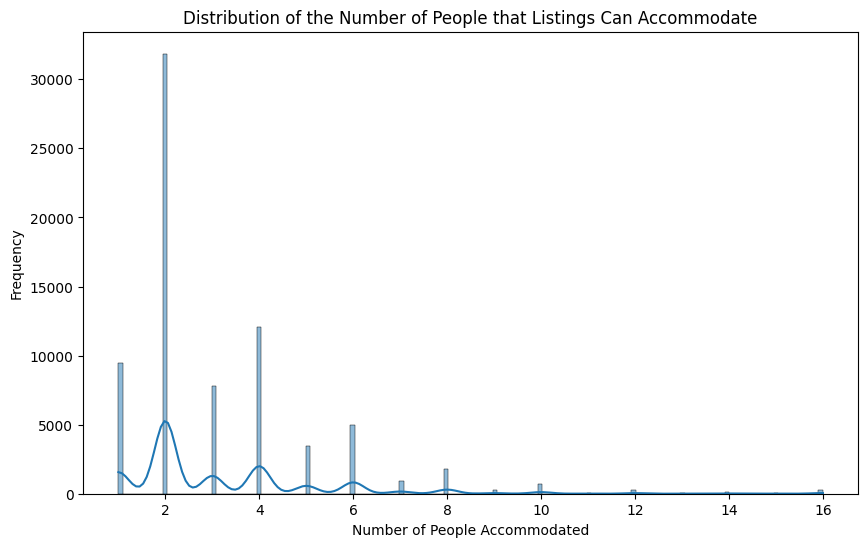

In [84]:
# Plotting the distribution of the number of people that listings can accommodate
plt.figure(figsize=(10, 6))
sns.histplot(df_new['accommodates'], kde=True)
plt.title('Distribution of the Number of People that Listings Can Accommodate')
plt.xlabel('Number of People Accommodated')
plt.ylabel('Frequency')
plt.show()

In [85]:
# Find the most common number of people that listings can accommodate
most_common_accommodates = df_new['accommodates'].mode()[0]
print(f"The most common number of people that listings can accommodate is {most_common_accommodates}")

The most common number of people that listings can accommodate is 2.0


In [86]:
# Calculate the average number of bathrooms in the listings
average_bathrooms = df_new['bathrooms'].mean()
print(f"The average number of bathrooms in the listings is {average_bathrooms:.2f}")

The average number of bathrooms in the listings is 1.24


In [87]:
# Check if there are any listings with more than one bathroom
more_than_one_bathroom_exists = (df_new['bathrooms'] > 1).any()

if more_than_one_bathroom_exists:
    print("Yes, there are listings with more than one bathroom.")
else:
    print("No, there are no listings with more than one bathroom.")

Yes, there are listings with more than one bathroom.


In [88]:
# Calculate the average cleaning fee for the listings
average_cleaning_fee = df['cleaning_fee'].mean()
average_cleaning_fee

np.float64(0.7340602102365499)

In [89]:
# Calculate the range of cleaning fees in the dataset
min_cleaning_fee = df_new['cleaning_fee'].min()
print(min_cleaning_fee)
max_cleaning_fee = df_new['cleaning_fee'].max()
print(max_cleaning_fee)

0.0
1.0


# connect to postgres sql

In [92]:
pip install psycopg2



   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.4 MB/s eta 0:00:00


In [93]:
from sqlalchemy import create_engine
import psycopg2

In [94]:
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
ENDPOINT = 'localhost'
USER = 'postgres'
PASSWORD = 'root'
PORT = 5432
DATABASE = 'air_bnb'

In [95]:
# Creating the connection string
connection_string = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}"
# Creating the engine
engine = create_engine(connection_string)

In [96]:
table_name = 'air_bnb1'
df_new.to_sql(table_name, con=engine, if_exists='replace', index=False)

111

In [97]:
table_name = "air_bnb1"
query = f'SELECT * FROM {table_name}'
df_from_sql = pd.read_sql(query, con=engine)

In [98]:
df_from_sql.head()

accommodates  bathrooms  cleaning_fee  instant_bookable  \
0           3.0        1.0           1.0                 0   
1           7.0        1.0           1.0                 1   
2           5.0        1.0           1.0                 1   
3           4.0        1.0           1.0                 0   
4           2.0        1.0           1.0                 1   

   review_scores_rating  bedrooms  beds  log_price  room_type_Private room  \
0                 100.0       1.0   1.0   5.010635                   False   
1                  93.0       3.0   3.0   5.129899                   False   
2                  92.0       1.0   3.0   4.976734                   False   
3                   NaN       2.0   2.0   6.620073                   False   
4                  40.0       0.0   1.0   4.744932                   False   

   room_type_Shared room  cancellation_policy_moderate  \
0                  False                         False   
1                  False                         False   
2                  False                          True   
3                  False                         False   
4                  False                          True   

   cancellation_policy_strict  
0                        True  
1                        True  
2                       False  
3                       False  
4                       False

In [99]:
query = "SELECT * FROM air_bnb1"
dfs = pd.read_sql(query, con=engine)

In [101]:
from sqlalchemy import create_engine, text
query = text("SELECT accommodates FROM air_bnb1 WHERE accommodates > 3")
with engine.connect() as con:
    rs = con.execute(query)  
    rows = rs.fetchall()
for row in rows:
    print(row)


(7.0,)
(5.0,)
(4.0,)
(4.0,)
(6.0,)
(8.0,)
(4.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(4.0,)
(5.0,)
(4.0,)
(8.0,)
(4.0,)
(6.0,)
(5.0,)
(4.0,)
(6.0,)
(9.0,)
(5.0,)
(6.0,)
(6.0,)
(6.0,)
(4.0,)
(7.0,)
(4.0,)
(4.0,)
(5.0,)
(5.0,)
(4.0,)
(9.0,)
(6.0,)
(9.0,)
(8.0,)
(4.0,)
(4.0,)
(10.0,)
(6.0,)
(7.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(7.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(5.0,)
(6.0,)
(5.0,)
(7.0,)
(4.0,)
(5.0,)
(6.0,)
(6.0,)
(4.0,)
(6.0,)
(6.0,)
(5.0,)
(4.0,)
(6.0,)
(4.0,)
(8.0,)
(5.0,)
(6.0,)
(4.0,)
(6.0,)
(4.0,)
(5.0,)
(4.0,)
(6.0,)
(6.0,)
(8.0,)
(6.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(10.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(10.0,)
(4.0,)
(5.0,)
(6.0,)
(4.0,)
(5.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(16.0,)
(4.0,)
(4.0,)
(4.0,)
(8.0,)
(6.0,)
(4.0,)
(5.0,)
(5.0,)
(4.0,)
(4.0,)
(7.0,)
(4.0,)
(8.0,)
(6.0,)
(4.0,)
(8.0,)
(4.0,)
(4.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(8.0,)
(4.0,)
(8.0,)
(4.0,)
(4.0,)
(4.0,)
(4.0,)
(6.0,)
(5.0,)
(4.0,)
(6.0,)
(6.0,)
(6.0,)
(4.0,)
(4.0,)
(6.0,)
(4.0,)
(4.0,)
(1

In [109]:
from sqlalchemy import create_engine, text


query = text("SELECT AVG(log_price) FROM air_bnb1")


with engine.connect() as con:
    rs = con.execute(query) 
    average_log_price = rs.scalar()  
    print("Average log_price:", average_log_price)


Average log_price: 4.782069108292468


In [115]:
#How does the average price vary by room type (room_type)?
query = "SELECT room_type, AVG(log_price) AS avg_log_price FROM air_bnb1 GROUP BY room_type"
with engine.connect() as con:
    rs = con.execute(query)
    # Fetch all results (since the query returns multiple rows)
    avrg_price_very_room_type = rs.fetchall()

# Print each room_type and its corresponding average log_price
for row in avrg_price_very_room_type:
    print(f"Room Type: {row['room_type']}, Average log_price: {row['avg_log_price']}")



ObjectNotExecutableError: Not an executable object: 'SELECT room_type, AVG(log_price) AS avg_log_price FROM air_bnb1 GROUP BY room_type'

In [105]:
from sqlalchemy import create_engine, text

# Assuming 'engine' is your SQLAlchemy engine
engine = create_engine('your_database_connection_string')

query = """
        SELECT room_type, AVG(log_price) AS avg_log_price
        FROM air_bnb1
        GROUP BY room_type
        """

with engine.connect() as con:
    result = con.execute(text(query))
    for row in result:
        print(f"Room Type: {row['room_type']}, Average Log Price: {row['avg_log_price']}")

ArgumentError: Could not parse SQLAlchemy URL from string 'your_database_connection_string'